# Data Exploration

## Overview
Explore the transaction dataset, check data quality, and understand distributions.

In [1]:
# Import libraries
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import plotly.express as px
import plotly.graph_objects as go
from plotly.subplots import make_subplots
import warnings
warnings.filterwarnings('ignore')

# Set visualization styles
plt.style.use('seaborn-v0_8-darkgrid')
sns.set_palette("husl")
plt.rcParams['figure.figsize'] = (12, 8)
plt.rcParams['font.size'] = 12

# For better display
pd.set_option('display.max_columns', None)
pd.set_option('display.max_rows', 100)
pd.set_option('display.float_format', '{:.2f}'.format)

print("✅ Libraries imported successfully")

✅ Libraries imported successfully


In [2]:
# Load the preprocessed data
try:
    df = pd.read_csv('../data/raw/customer_data_with_regions_filled.csv')
    print(f"✅ Data loaded successfully! Shape: {df.shape}")
except FileNotFoundError:
    # If preprocessed file doesn't exist, use the raw data
    print("⚠️ Preprocessed file not found. Loading raw data...")
    df = pd.read_csv('../data/raw/customer_data_with_regions_filled.csv')
    print(f"✅ Raw data loaded! Shape: {df.shape}")

# Display first few rows
print("\n📋 First 5 rows:")
display(df.head())

✅ Data loaded successfully! Shape: (1138311, 16)

📋 First 5 rows:


,Account_Number,Customer_Branch_Code,Branch_Name,Longitude,Latitude,End_of_Month,Current_Balance_LCY,Transaction_Amount,Last_Debit_Transaction_Date,Last_Credit_Transaction_Date,Transaction_Channel_Name,Channel_Category,Is_Channel_Flag,Total_Transaction_Count,Debit_Credit_Flag,Region
0,2045320689130240,1,Ridge Tower,-0.20,5.56,2025-03-31,1043797061,30930000.00,2025-03-27 21:56:04,2025-03-27 20:01:18,Branch/Teller Username,Branch/Teller,0.00,1.00,D,Greater Accra Region
1,2045320689130240,1,Ridge Tower,-0.20,5.56,2025-03-31,1043797061,14434000.00,2025-03-27 14:40:37,2025-03-27 07:55:46,System User,System/Service User,1.00,1.00,D,Greater Accra Region
2,2045320689130240,1,Ridge Tower,-0.20,5.56,2025-03-31,1043797061,1031000.00,2025-03-27 04:52:29,2025-03-27 10:48:47,Branch/Teller Username,Branch/Teller,0.00,1.00,D,Greater Accra Region
3,2045320689130240,1,Ridge Tower,-0.20,5.56,2025-03-31,1043797061,1031000.00,2025-03-27 21:38:59,2025-03-27 23:33:35,Branch/Teller Username,Branch/Teller,0.00,1.00,D,Greater Accra Region
4,2045320689130240,1,Ridge Tower,-0.20,5.56,2025-03-31,1043797061,721700000.00,2025-03-27 03:28:26,2025-03-27 00:17:24,System User,System/Service User,1.00,1.00,C,Greater Accra Region


In [3]:
# Display dataset information
print("\n📊 Dataset Information:")
print("="*60)
print(f"Total records: {df.shape[0]:,}")
print(f"Total columns: {df.shape[1]}")
print(f"Memory usage: {df.memory_usage(deep=True).sum() / 1024**2:.2f} MB")


📊 Dataset Information:
Total records: 1,138,311
Total columns: 16
Memory usage: 702.94 MB


Data Quality Assessment

In [4]:
# Data quality checks
print("🔍 DATA QUALITY CHECK")
print("="*60)

# Check data types
print("📝 Data Types:")
print(df.dtypes)
print("\n" + "="*60)

🔍 DATA QUALITY CHECK
📝 Data Types:
Account_Number                    int64
Customer_Branch_Code              int64
Branch_Name                      object
Longitude                       float64
Latitude                        float64
End_of_Month                     object
Current_Balance_LCY               int64
Transaction_Amount              float64
Last_Debit_Transaction_Date      object
Last_Credit_Transaction_Date     object
Transaction_Channel_Name         object
Channel_Category                 object
Is_Channel_Flag                 float64
Total_Transaction_Count         float64
Debit_Credit_Flag                object
Region                           object
dtype: object



In [5]:
# Convert date columns to datetime format
date_columns = ['End_of_Month', 'Last_Debit_Transaction_Date', 'Last_Credit_Transaction_Date']
for col in date_columns:
    if col in df.columns:
        df[col] = pd.to_datetime(df[col], errors='coerce')
        print(f"Converted {col} to datetime")

Converted End_of_Month to datetime
Converted Last_Debit_Transaction_Date to datetime
Converted Last_Credit_Transaction_Date to datetime


In [6]:
# Check for missing values
print("\n🔎 MISSING VALUES ANALYSIS")
print("="*60)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Values': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).values,
    'Data_Type': df.dtypes.values
})

# Sort by missing percentage
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)

# Display missing values summary
display(missing_data.style.background_gradient(subset=['Missing_Percentage'], cmap='Reds'))


🔎 MISSING VALUES ANALYSIS


,Column,Missing_Values,Missing_Percentage,Data_Type
7,Transaction_Amount,4368,0.383726,float64
13,Total_Transaction_Count,4368,0.383726,float64
10,Transaction_Channel_Name,4368,0.383726,object
14,Debit_Credit_Flag,4368,0.383726,object
12,Is_Channel_Flag,4368,0.383726,float64
11,Channel_Category,4368,0.383726,object
2,Branch_Name,0,0.000000,object
0,Account_Number,0,0.000000,int64
6,Current_Balance_LCY,0,0.000000,int64
5,End_of_Month,0,0.000000,datetime64[ns]


In [7]:
# Check for missing values
print("\n🔎 MISSING VALUES ANALYSIS")
print("="*60)

missing_data = pd.DataFrame({
    'Column': df.columns,
    'Missing_Values': df.isnull().sum().values,
    'Missing_Percentage': (df.isnull().sum() / len(df) * 100).values,
    'Data_Type': df.dtypes.values
})

# Sort by missing percentage
missing_data = missing_data.sort_values('Missing_Percentage', ascending=False)

# Display missing values summary
print("\n📊 MISSING VALUES SUMMARY:")
print("-" * 40)
print(f"Total records: {len(df):,}")
print(f"Columns with missing values: {(missing_data['Missing_Values'] > 0).sum()}")
print(f"Total missing values: {df.isnull().sum().sum():,}")
print(f"Overall completeness: {(1 - df.isnull().sum().sum() / (len(df) * len(df.columns))) * 100:.2f}%")

# Display the table
display(missing_data.style.background_gradient(subset=['Missing_Percentage'], cmap='Reds'))

# Detailed analysis of columns with missing values
print("\n📋 DETAILED ANALYSIS OF COLUMNS WITH MISSING VALUES:")
print("-" * 60)

columns_with_missing = missing_data[missing_data['Missing_Values'] > 0]
if len(columns_with_missing) > 0:
    for _, row in columns_with_missing.iterrows():
        col = row['Column']
        missing_count = row['Missing_Values']
        missing_pct = row['Missing_Percentage']
        dtype = row['Data_Type']
        
        print(f"\n📌 Column: {col}")
        print(f"   • Data Type: {dtype}")
        print(f"   • Missing Values: {missing_count:,} ({missing_pct:.3f}%)")
        
        # Show sample of non-missing values for context
        non_missing = df[col].dropna()
        if len(non_missing) > 0:
            unique_values = non_missing.nunique()
            value_counts = non_missing.value_counts().head(3)
            
            print(f"   • Unique Values: {unique_values:,}")
            print(f"   • Top 3 values:")
            for value, count in value_counts.items():
                print(f"     - {value}: {count:,} ({count/len(non_missing)*100:.1f}%)")
            
            # Statistical summary for numeric columns
            if dtype in ['int64', 'float64']:
                print(f"   • Statistics: mean={non_missing.mean():.2f}, "
                      f"min={non_missing.min():.2f}, max={non_missing.max():.2f}")
        
        print(f"   • Completeness: {(1 - missing_pct/100)*100:.2f}%")

# Pattern analysis - are missing values correlated?
print("\n🔗 PATTERN ANALYSIS: CORRELATED MISSINGNESS")
print("-" * 60)

# Check if same rows have multiple missing values
missing_pattern = df[columns_with_missing['Column'].tolist()].isnull()
missing_by_row = missing_pattern.sum(axis=1)

print("Missing values per row distribution:")
for count in sorted(missing_by_row.unique()):
    row_count = (missing_by_row == count).sum()
    pct = row_count / len(df) * 100
    print(f"  • {count} missing values: {row_count:,} rows ({pct:.3f}%)")

# Check correlation between missingness
if len(columns_with_missing) > 1:
    print("\nMissing value co-occurrence (first 3 columns):")
    for i in range(min(3, len(columns_with_missing))):
        col1 = columns_with_missing.iloc[i]['Column']
        for j in range(i+1, min(4, len(columns_with_missing))):
            col2 = columns_with_missing.iloc[j]['Column']
            both_missing = ((df[col1].isnull()) & (df[col2].isnull())).sum()
            if both_missing > 0:
                pct_of_total = both_missing / len(df) * 100
                pct_of_missing1 = both_missing / df[col1].isnull().sum() * 100
                print(f"  • {col1} & {col2}: {both_missing:,} rows ({pct_of_total:.3f}%)")
                print(f"    → {pct_of_missing1:.1f}% of {col1} missing also have {col2} missing")

# IMPUTATION STRATEGY RECOMMENDATIONS
print("\n🎯 RECOMMENDED IMPUTATION STRATEGY")
print("="*60)

print("\n1. 🟢 COLUMNS WITH 0.38% MISSING (4,368 records):")
print("   These columns have the same number of missing values, suggesting systematic missingness:")
print("   • Transaction_Amount (float64)")
print("   • Transaction_Channel_Name (object)")
print("   • Channel_Category (object)")
print("   • Total_Transaction_Count (float64)")
print("   • Debit_Credit_Flag (object)")
print("   • Is_Channel_Flag (float64)")

print("\n   🔍 Investigation needed:")
print("   • Are these from the same time period/branch/customer segment?")
print("   • Could be system recording issues for specific transaction types")
print("   • Check if missing values correspond to specific dates or branches")

print("\n   ✅ Recommended actions:")
print("   a) TEMPORARY IMPUTATION (for analysis):")
print("      • Numeric columns (Transaction_Amount, Total_Transaction_Count, Is_Channel_Flag):")
print("        → Impute with median by customer or channel")
print("      • Categorical columns (Transaction_Channel_Name, Channel_Category, Debit_Credit_Flag):")
print("        → Impute with mode or 'Unknown' category")

print("\n   b) PERMANENT SOLUTION:")
print("      • Identify root cause of systematic missingness")
print("      • Work with IT/data entry teams to fix data collection")
print("      • Consider if these records should be excluded from certain analyses")

# Sample imputation code
print("\n2. ⚙️ SAMPLE IMPUTATION CODE:")
print("-" * 40)

imputation_code = """
# OPTION 1: Simple imputation for quick analysis
df_imputed = df.copy()

# For numeric columns
numeric_cols = ['Transaction_Amount', 'Total_Transaction_Count', 'Is_Channel_Flag']
for col in numeric_cols:
    if col in df_imputed.columns:
        # Impute with median (more robust than mean for transaction amounts)
        median_value = df_imputed[col].median()
        df_imputed[col] = df_imputed[col].fillna(median_value)
        print(f"Imputed {col} with median: {median_value:.2f}")

# For categorical columns
categorical_cols = ['Transaction_Channel_Name', 'Channel_Category', 'Debit_Credit_Flag']
for col in categorical_cols:
    if col in df_imputed.columns:
        # Impute with mode (most frequent value)
        mode_value = df_imputed[col].mode()[0] if not df_imputed[col].mode().empty else 'Unknown'
        df_imputed[col] = df_imputed[col].fillna(mode_value)
        print(f"Imputed {col} with mode: {mode_value}")

# OPTION 2: More sophisticated imputation
def impute_by_customer_group(df):
    \"""Impute missing values using customer behavior patterns\"""
    df_imputed = df.copy()
    
    # Group by customer and impute based on their typical behavior
    if 'Transaction_Amount' in df_imputed.columns:
        customer_median = df_imputed.groupby('Account_Number')['Transaction_Amount'].transform('median')
        df_imputed['Transaction_Amount'] = df_imputed['Transaction_Amount'].fillna(customer_median)
    
    # For categorical, use customer's most common channel
    if 'Transaction_Channel_Name' in df_imputed.columns:
        customer_mode = df_imputed.groupby('Account_Number')['Transaction_Channel_Name'].transform(
            lambda x: x.mode()[0] if not x.mode().empty else 'Unknown'
        )
        df_imputed['Transaction_Channel_Name'] = df_imputed['Transaction_Channel_Name'].fillna(customer_mode)
    
    return df_imputed

# OPTION 3: Flag imputed values
df['Transaction_Amount_Imputed'] = df['Transaction_Amount'].isnull()
# Then impute as needed
"""

print(imputation_code)

# DECISION TREE FOR HANDLING MISSING VALUES
print("\n3. 🤔 DECISION GUIDE FOR HANDLING MISSING VALUES:")
print("-" * 60)

print("""
Should you impute or remove missing values?
------------------------------------------
✓ IMPUTE IF:
  • Missing rate < 5% (yours is 0.38% - excellent!)
  • Missing is random or explainable
  • Columns are important for analysis
  • You need complete dataset for modeling

✓ REMOVE IF:
  • Missing rate > 30%
  • Missing is systematic and cannot be reliably imputed
  • Columns are not critical for analysis
  • Sample size remains statistically significant after removal

✓ FLAG AND ANALYZE IF:
  • Missing patterns provide business insights
  • You suspect data quality issues
  • Need to track imputation impact
""")

# FINAL RECOMMENDATION
print("\n4. ✅ FINAL RECOMMENDATION FOR YOUR DATASET:")
print("-" * 60)

print(f"""
Based on your data quality:
• Missing rate: Only 0.38% - EXCELLENT
• Affected columns: 6 out of many
• Pattern: All have exactly 4,368 missing values (likely systematic)

RECOMMENDED APPROACH:
1. FIRST, investigate why these 4,368 records are missing the same columns
   → Check dates, branches, customer segments
   → Look for system maintenance periods

2. For immediate analysis, use OPTION 1 (simple median/mode imputation)
   → Quick and maintains data structure
   → Minimal impact on statistics

3. For modeling, consider OPTION 2 (customer-group imputation)
   → More accurate for individual customer behavior
   → Preserves customer-specific patterns

4. Always create imputation flags to track changes:
   → Add columns like 'Amount_Imputed_Flag'
   → Monitor impact on anomaly detection

5. Long-term: Fix data collection at source
   → Work with IT team
   → Add data validation rules
""")

# Quick check: Show sample of rows with missing values
print("\n5. 🔍 SAMPLE OF ROWS WITH MISSING VALUES:")
print("-" * 60)

missing_rows = df[df.isnull().any(axis=1)]
if len(missing_rows) > 0:
    print(f"Showing 5 sample rows with missing values:")
    sample_cols = ['Account_Number', 'Transaction_Date', 'Transaction_Amount', 
                   'Transaction_Channel_Name', 'Debit_Credit_Flag']
    available_cols = [col for col in sample_cols if col in missing_rows.columns]
    
    display(missing_rows[available_cols].head().style.highlight_null(color='yellow'))
    
    # Check if missing values cluster by date
    if 'Transaction_Date' in missing_rows.columns:
        missing_by_date = missing_rows['Transaction_Date'].dt.date.value_counts().head(5)
        print(f"\nTop 5 dates with missing values:")
        for date, count in missing_by_date.items():
            print(f"  • {date}: {count:,} records")
else:
    print("No missing values found in the dataset!")

print("\n" + "="*60)
print("✅ MISSING VALUES ANALYSIS COMPLETE")
print("="*60)


🔎 MISSING VALUES ANALYSIS

📊 MISSING VALUES SUMMARY:
----------------------------------------
Total records: 1,138,311
Columns with missing values: 6
Total missing values: 26,208
Overall completeness: 99.86%


,Column,Missing_Values,Missing_Percentage,Data_Type
7,Transaction_Amount,4368,0.383726,float64
13,Total_Transaction_Count,4368,0.383726,float64
10,Transaction_Channel_Name,4368,0.383726,object
14,Debit_Credit_Flag,4368,0.383726,object
12,Is_Channel_Flag,4368,0.383726,float64
11,Channel_Category,4368,0.383726,object
2,Branch_Name,0,0.000000,object
0,Account_Number,0,0.000000,int64
6,Current_Balance_LCY,0,0.000000,int64
5,End_of_Month,0,0.000000,datetime64[ns]



📋 DETAILED ANALYSIS OF COLUMNS WITH MISSING VALUES:
------------------------------------------------------------

📌 Column: Transaction_Amount
   • Data Type: float64
   • Missing Values: 4,368 (0.384%)
   • Unique Values: 15,995
   • Top 3 values:
     - 10.0: 136,046 (12.0%)
     - 10310.0: 58,287 (5.1%)
     - 21.0: 22,755 (2.0%)
   • Statistics: mean=19227719.92, min=-831033520.65, max=36188100000.00
   • Completeness: 99.62%

📌 Column: Total_Transaction_Count
   • Data Type: float64
   • Missing Values: 4,368 (0.384%)
   • Unique Values: 117
   • Top 3 values:
     - 1.0: 729,772 (64.4%)
     - 2.0: 115,199 (10.2%)
     - 3.0: 59,900 (5.3%)
   • Statistics: mean=3.30, min=1.00, max=288.00
   • Completeness: 99.62%

📌 Column: Transaction_Channel_Name
   • Data Type: object
   • Missing Values: 4,368 (0.384%)
   • Unique Values: 22
   • Top 3 values:
     - System User: 478,458 (42.2%)
     - Mistral: 166,765 (14.7%)
     - Branch/Teller Username: 141,845 (12.5%)
   • Completeness:

,Account_Number,Transaction_Amount,Transaction_Channel_Name,Debit_Credit_Flag
14683,2106061238876440,nan,nan,nan
14684,2106061238876440,nan,nan,nan
14685,2106061238876440,nan,nan,nan
14686,2106061238876440,nan,nan,nan
14687,2106061238876440,nan,nan,nan



✅ MISSING VALUES ANALYSIS COMPLETE


In [8]:
# See customer details for those with missing regions
missing_region_details = df[df['Region'].isnull()][['Account_Number', 'Customer_Branch_Code', 'Branch_Name', 'Region']]

print("Customers with missing Region:")
print(missing_region_details.head(20))
print(f"\nTotal: {len(missing_region_details)} customers")

# Save to CSV file
missing_region_details.to_csv('customers_missing_regions.csv', index=False)
print("\n✅ Saved to 'customers_missing_regions.csv'")

Customers with missing Region:
Empty DataFrame
Columns: [Account_Number, Customer_Branch_Code, Branch_Name, Region]
Index: []

Total: 0 customers

✅ Saved to 'customers_missing_regions.csv'


In [9]:
# Get unique Customer_Branch_Code values
unique_branch_codes = missing_region_details['Customer_Branch_Code'].unique()
print(f"Number of unique branch codes with missing Region: {len(unique_branch_codes)}")
print("\nUnique branch codes:")
print(unique_branch_codes[:50])

Number of unique branch codes with missing Region: 0

Unique branch codes:
[]


In [10]:
# Create mapping dictionary
region_mapping = {
    501: 'Volta Region',
    409: 'Western Region',
    6: 'Greater Accra Region',
    83: 'Greater Accra Region',
    84: 'Greater Accra Region',
    85: 'Greater Accra Region',
    609: 'Ashanti Region',
    612: 'Ashanti Region',
    608: 'Ashanti Region',
    601: 'Ashanti Region',
    603: 'Ashanti Region',
    616: 'Ashanti Region'
}

# Fill missing regions using the mapping
print(f"Missing regions before: {df['Region'].isnull().sum()}")

# Method 1a: Using map()
df['Region'] = df.apply(
    lambda row: region_mapping.get(row['Customer_Branch_Code']) 
    if pd.isnull(row['Region']) 
    else row['Region'], 
    axis=1
)

# Method 1b: Alternative using fillna with map
# df['Region'] = df['Region'].fillna(df['Customer_Branch_Code'].map(region_mapping))

print(f"Missing regions after: {df['Region'].isnull().sum()}")

Missing regions before: 0
Missing regions after: 0


In [11]:
# Save to new CSV file
# df.to_csv('../data/raw/customer_data_with_regions_filled.csv', index=False)
# print("✅ Saved to '../data/raw/customer_data_with_regions_filled.csv'")

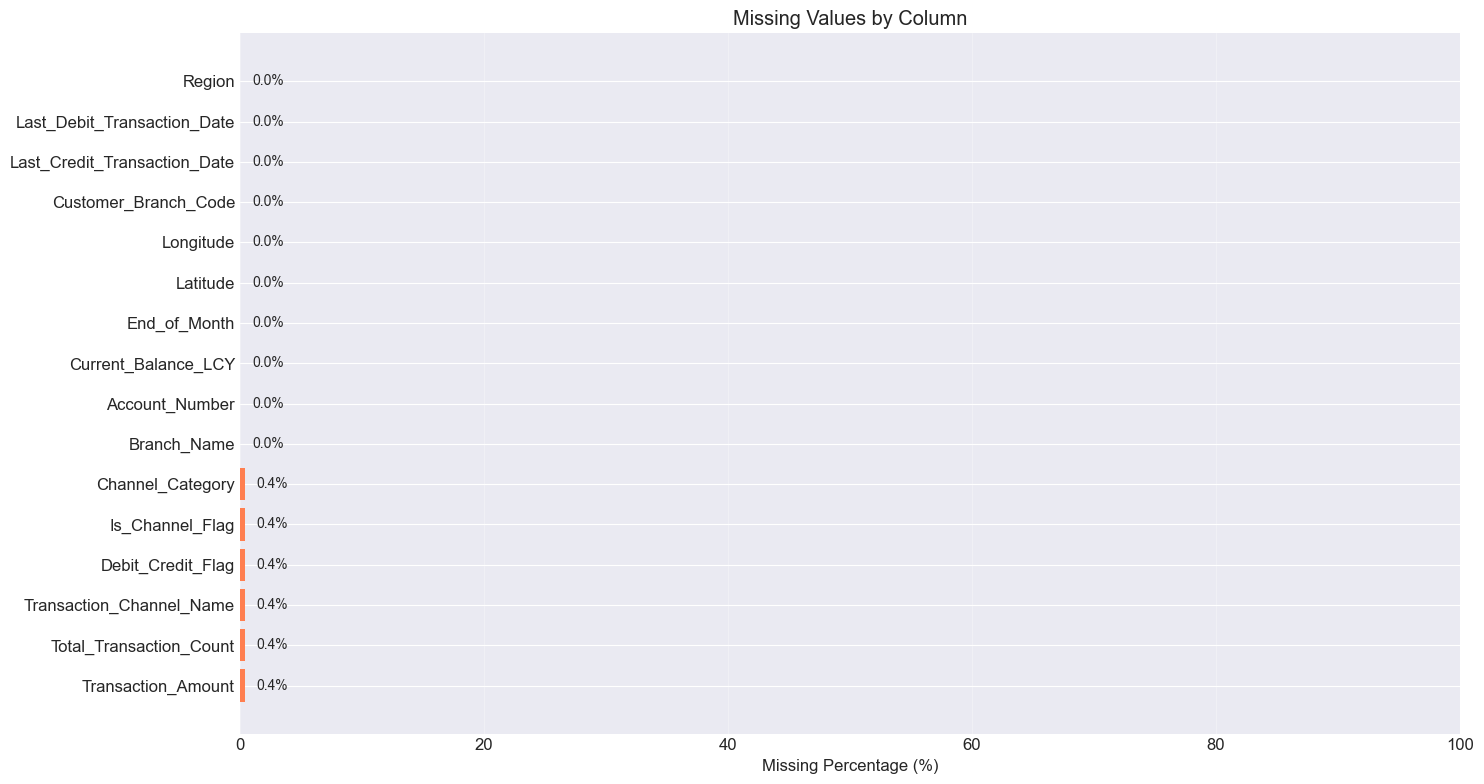

In [12]:
# Visualize missing values
plt.figure(figsize=(15, 8))
bars = plt.barh(missing_data['Column'], missing_data['Missing_Percentage'], color='coral')
plt.xlabel('Missing Percentage (%)')
plt.title('Missing Values by Column')
plt.xlim(0, 100)
plt.grid(axis='x', alpha=0.3)

# Add value labels
for bar in bars:
    width = bar.get_width()
    plt.text(width + 1, bar.get_y() + bar.get_height()/2, 
             f'{width:.1f}%', va='center', fontsize=10)

plt.tight_layout()
plt.show()

In [38]:
# See customer details for those with missing regions
missing_channel_details = df[df['Transaction_Channel_Name'].isnull()][['Account_Number', 'Customer_Branch_Code', 'Branch_Name', 'Region']]

print("Customers with missing Transaction Channel:")
print(missing_channel_details.head(20))
print(f"\nTotal: {len(missing_channel_details)} customers")

Customers with missing Transaction Channel:
         Account_Number  Customer_Branch_Code  Branch_Name  \
14683  2106061238876440                     1  Ridge Tower   
14684  2106061238876440                     1  Ridge Tower   
14685  2106061238876440                     1  Ridge Tower   
14686  2106061238876440                     1  Ridge Tower   
14687  2106061238876440                     1  Ridge Tower   
14688  2106061238876440                     1  Ridge Tower   
14689  2106061238876440                     1  Ridge Tower   
14690  2106061238876440                     1  Ridge Tower   
14691  2106061238876440                     1  Ridge Tower   
14692  2106061238876440                     1  Ridge Tower   
14693  2106061238876440                     1  Ridge Tower   
17924  2126299229678740                   501   HoPostBank   
17925  2126299229678740                   501   HoPostBank   
17926  2126299229678740                   501   HoPostBank   
17927  2126299229678740   

In [13]:
# Check for duplicate records
print(f"\n🔍 DUPLICATE RECORDS: {df.duplicated().sum():,} out of {len(df):,}")
print(f"Duplicate percentage: {(df.duplicated().sum() / len(df) * 100):.2f}%")


🔍 DUPLICATE RECORDS: 0 out of 1,138,311
Duplicate percentage: 0.00%


In [14]:
print("📊 STATISTICAL SUMMARY")
print("="*60)

# Generate comprehensive statistical summary
numeric_cols = df.select_dtypes(include=[np.number]).columns
categorical_cols = df.select_dtypes(include=['object', 'category']).columns

print(f"\n📈 Numeric Columns ({len(numeric_cols)}):")
for col in numeric_cols:
    print(f"  • {col}")

print(f"\n📝 Categorical Columns ({len(categorical_cols)}):")
for col in categorical_cols:
    print(f"  • {col}")

📊 STATISTICAL SUMMARY

📈 Numeric Columns (8):
  • Account_Number
  • Customer_Branch_Code
  • Longitude
  • Latitude
  • Current_Balance_LCY
  • Transaction_Amount
  • Is_Channel_Flag
  • Total_Transaction_Count

📝 Categorical Columns (5):
  • Branch_Name
  • Transaction_Channel_Name
  • Channel_Category
  • Debit_Credit_Flag
  • Region


In [15]:
# Detailed numeric statistics
print("\n📊 NUMERIC FEATURES STATISTICS")
print("="*60)

numeric_stats = df[numeric_cols].describe().T
numeric_stats['IQR'] = numeric_stats['75%'] - numeric_stats['25%']
numeric_stats['CV'] = (numeric_stats['std'] / numeric_stats['mean']).abs() * 100  # Coefficient of Variation
numeric_stats['Missing'] = df[numeric_cols].isnull().sum().values
numeric_stats['Missing_Pct'] = (df[numeric_cols].isnull().sum() / len(df) * 100).values

display(numeric_stats.style.background_gradient(subset=['mean', 'std', 'CV'], cmap='YlOrRd'))


📊 NUMERIC FEATURES STATISTICS


,count,mean,std,min,25%,50%,75%,max,IQR,CV,Missing,Missing_Pct
Account_Number,1138311.000000,4093799525462836.000000,1069288394160215.750000,2045320689130240.000000,4110803539202740.000000,4231554918979765.000000,4252786189624165.000000,16343543279688340.000000,141982650421425.000000,26.119706,0,0.000000
Customer_Branch_Code,1138311.000000,166.991768,236.039293,1.000000,24.000000,83.000000,123.000000,901.000000,99.000000,141.347862,0,0.000000
Longitude,1138311.000000,-0.488703,0.617995,-2.999437,-0.254063,-0.213762,-0.200233,0.470278,0.053830,126.456062,0,0.000000
Latitude,1138311.000000,5.863692,1.018007,0.000000,5.563179,5.564580,5.687188,10.785438,0.124009,17.361202,0,0.000000
Current_Balance_LCY,1138311.000000,51120756.105651,295045599.521290,1031.000000,9176.000000,224706.000000,3635564.000000,5007421155.000000,3626388.000000,577.154217,0,0.000000
Transaction_Amount,1133943.000000,19227719.920035,251756872.956169,-831033520.650000,835.000000,22682.000000,1031000.000000,36188100000.000000,1030165.000000,1309.343354,4368,0.383726
Is_Channel_Flag,1133943.000000,0.874910,0.330821,0.000000,1.000000,1.000000,1.000000,1.000000,0.000000,37.812024,4368,0.383726
Total_Transaction_Count,1133943.000000,3.302731,6.408143,1.000000,1.000000,1.000000,3.000000,288.000000,2.000000,194.025560,4368,0.383726


In [16]:
# Detailed categorical statistics
print("\n📊 CATEGORICAL FEATURES STATISTICS")
print("="*60)

categorical_stats = []
for col in categorical_cols:
    unique_count = df[col].nunique()
    top_value = df[col].mode().iloc[0] if not df[col].mode().empty else 'N/A'
    top_freq = (df[col] == top_value).sum() if top_value != 'N/A' else 0
    top_pct = (top_freq / len(df) * 100) if top_value != 'N/A' else 0
    
    categorical_stats.append({
        'Column': col,
        'Unique_Count': unique_count,
        'Top_Value': str(top_value)[:50],  # Truncate long strings
        'Top_Frequency': top_freq,
        'Top_Percentage': f"{top_pct:.1f}%",
        'Missing_Values': df[col].isnull().sum()
    })

categorical_df = pd.DataFrame(categorical_stats)
display(categorical_df.style.background_gradient(subset=['Unique_Count'], cmap='Blues'))


📊 CATEGORICAL FEATURES STATISTICS


,Column,Unique_Count,Top_Value,Top_Frequency,Top_Percentage,Missing_Values
0,Branch_Name,91,MTN GHANA HQ - YELLOSAVE MTN,190707,16.8%,0
1,Transaction_Channel_Name,22,System User,478458,42.0%,4368
2,Channel_Category,6,System/Service User,481872,42.3%,4368
3,Debit_Credit_Flag,2,C,573906,50.4%,4368
4,Region,13,Greater Accra Region,864330,75.9%,0


📈 DISTRIBUTION ANALYSIS


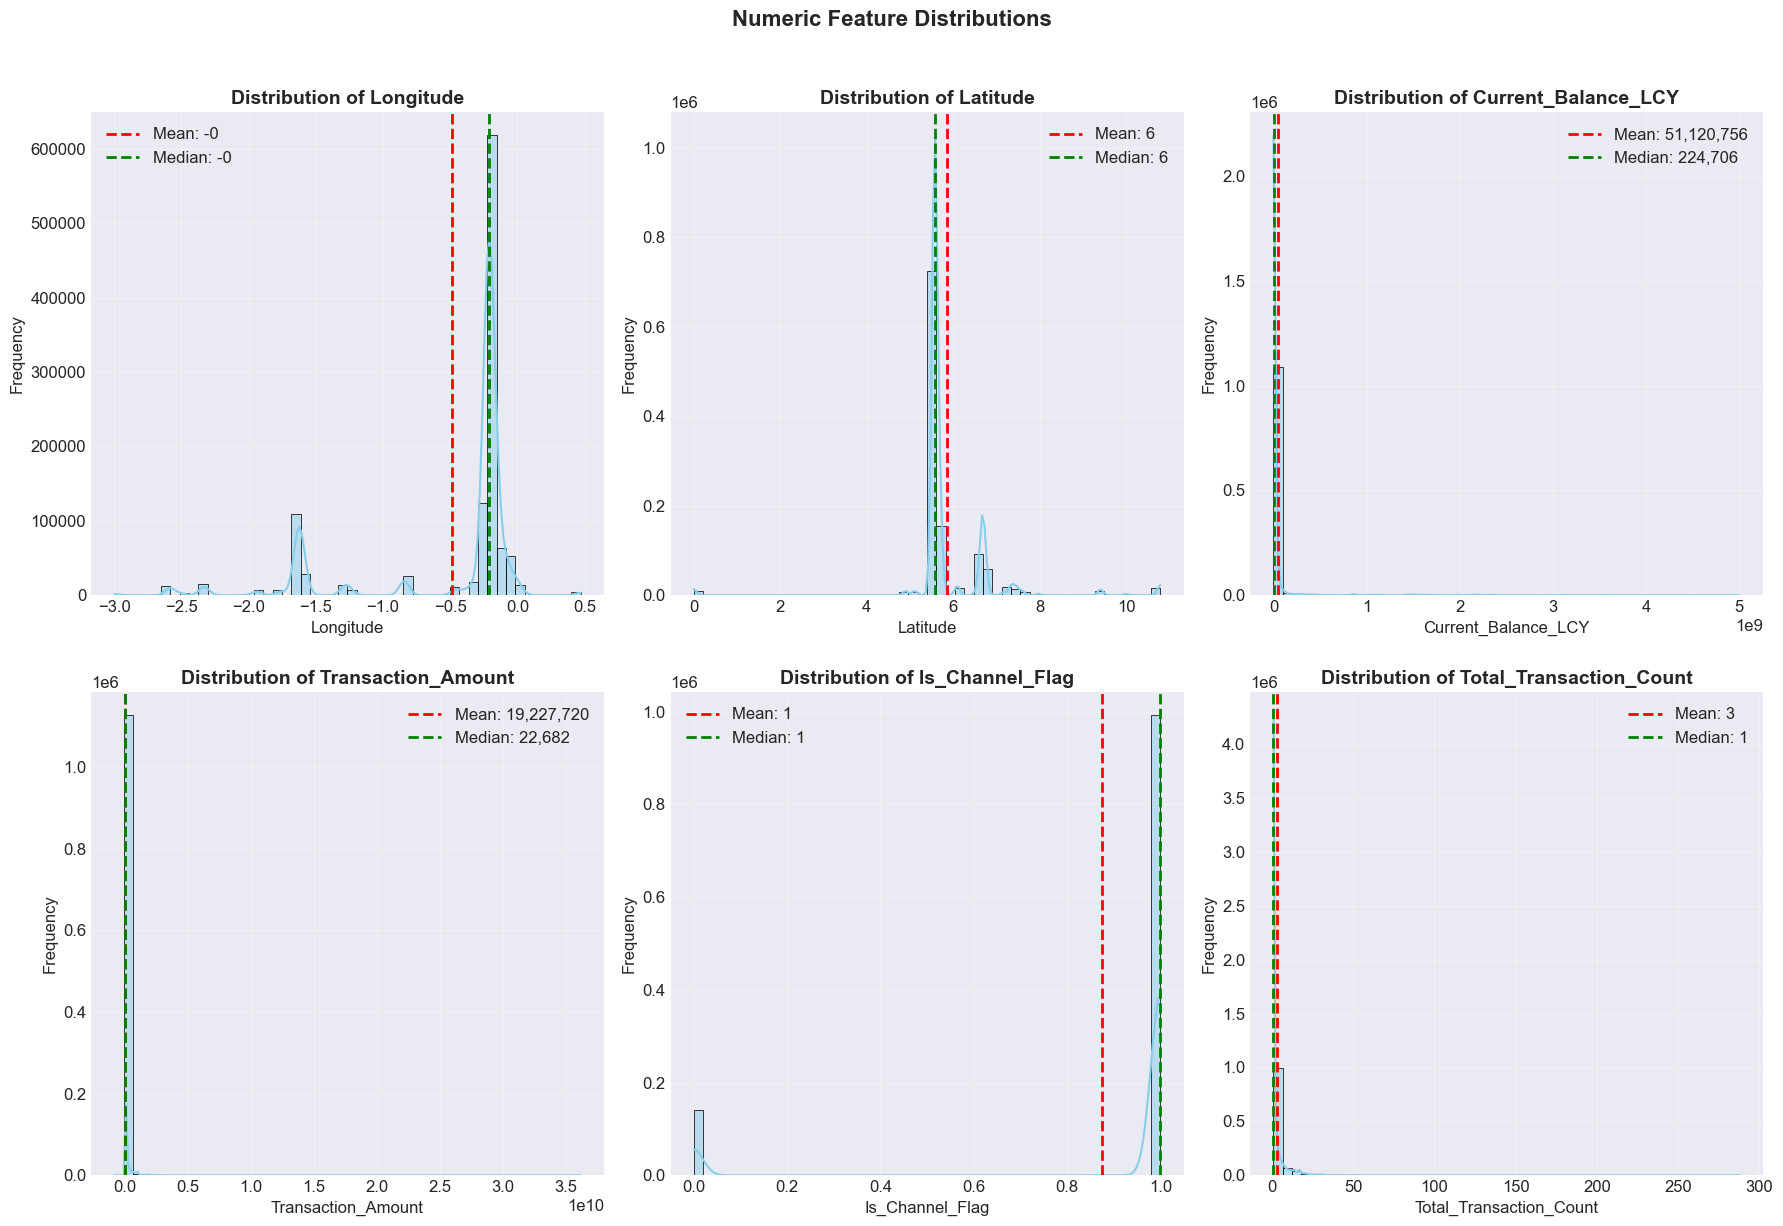

In [17]:
print("📈 DISTRIBUTION ANALYSIS")
print("="*60)

# Create subplot for numeric distributions
numeric_to_plot = [col for col in numeric_cols if col not in ['Account_Number', 'Customer_Branch_Code']]

fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(numeric_to_plot[:6]):  # Plot first 6 numeric columns
    ax = axes[idx]
    
    # Histogram with KDE
    sns.histplot(df[col].dropna(), kde=True, ax=ax, bins=50, color='skyblue', edgecolor='black')
    
    # Add mean and median lines
    mean_val = df[col].mean()
    median_val = df[col].median()
    
    ax.axvline(mean_val, color='red', linestyle='--', linewidth=2, label=f'Mean: {mean_val:,.0f}')
    ax.axvline(median_val, color='green', linestyle='--', linewidth=2, label=f'Median: {median_val:,.0f}')
    
    ax.set_title(f'Distribution of {col}', fontsize=14, fontweight='bold')
    ax.set_xlabel(col)
    ax.set_ylabel('Frequency')
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Numeric Feature Distributions', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

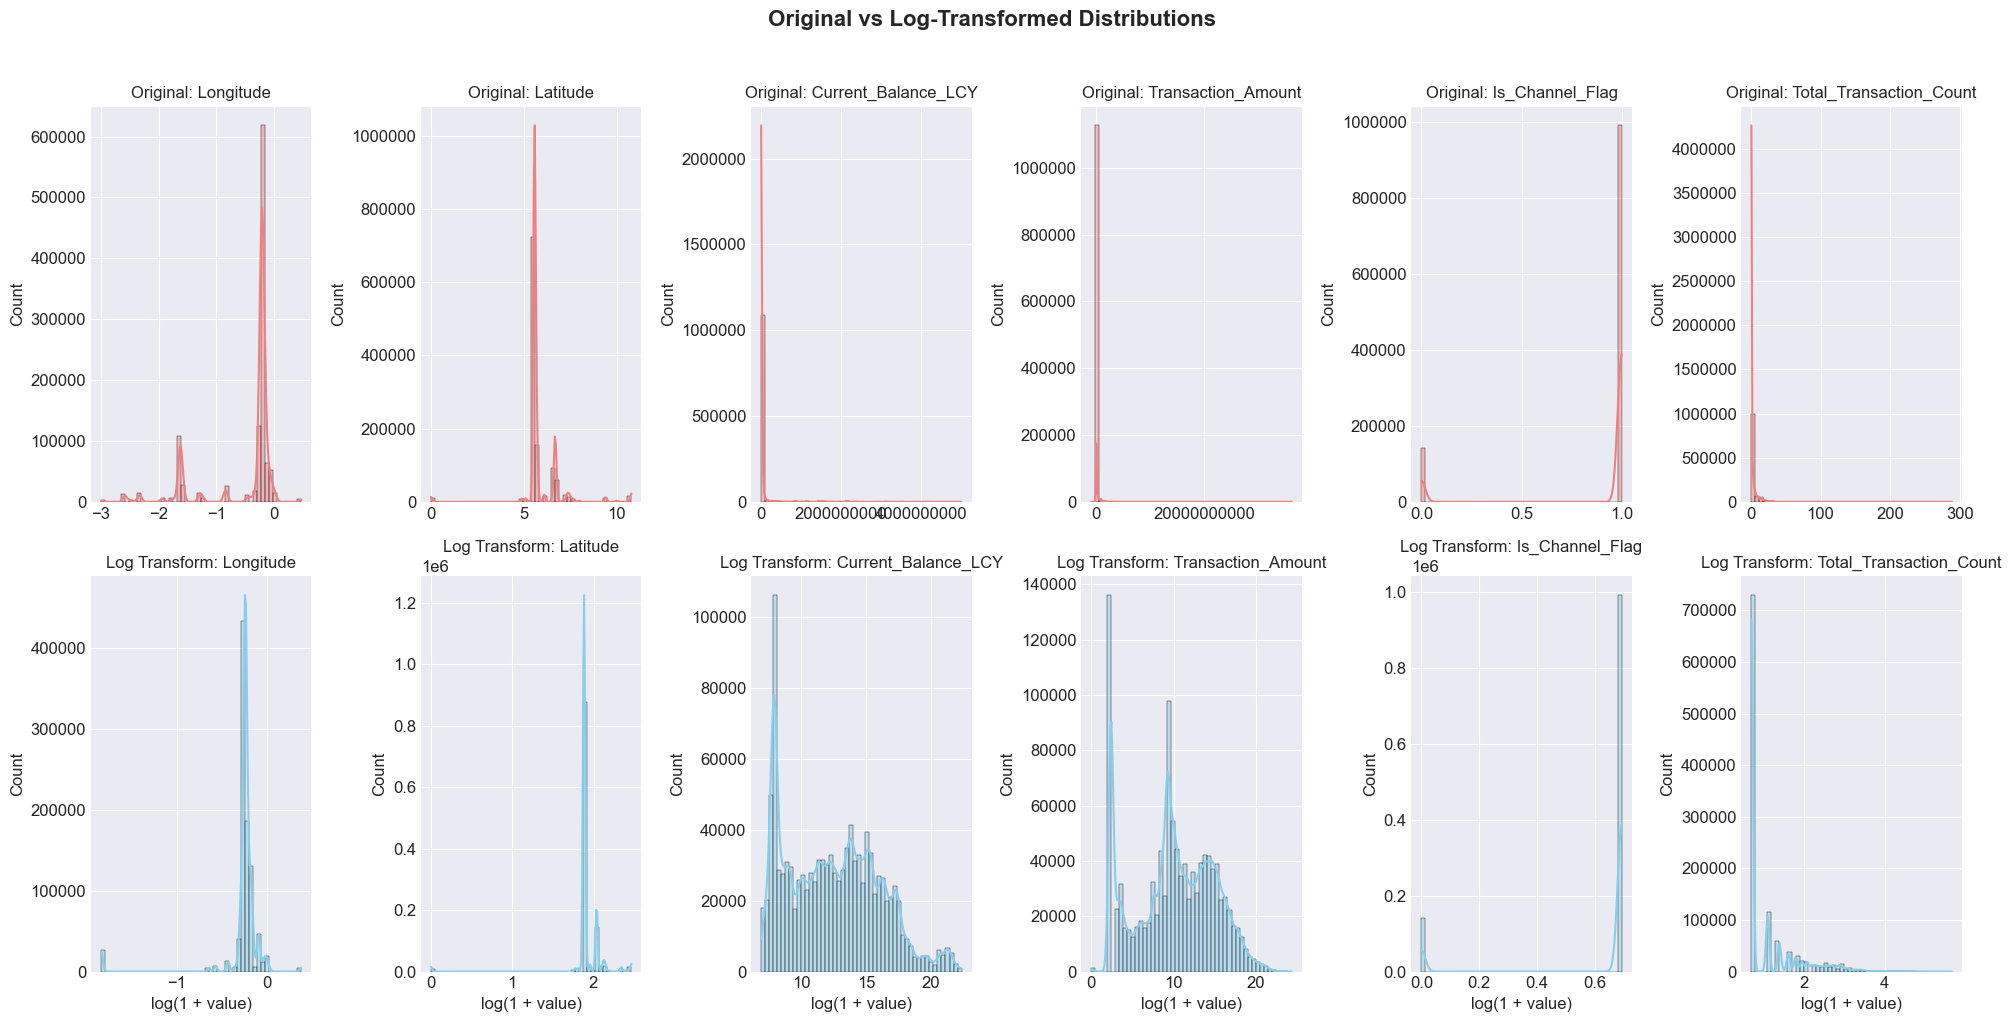

In [18]:
fig, axes = plt.subplots(2, 6, figsize=(20, 10))

for idx, col in enumerate(numeric_to_plot[:6]):
    # Original distribution
    ax1 = axes[0, idx]
    sns.histplot(df[col].dropna(), kde=True, ax=ax1, bins=50, 
                 color='lightcoral', edgecolor='black')
    ax1.set_title(f'Original: {col}', fontsize=12)
    ax1.set_xlabel('')
    ax1.ticklabel_format(style='plain')
    
    # Log distribution
    ax2 = axes[1, idx]
    log_data = np.log1p(df[col].dropna())
    sns.histplot(log_data, kde=True, ax=ax2, bins=50, 
                 color='skyblue', edgecolor='black')
    ax2.set_title(f'Log Transform: {col}', fontsize=12)
    ax2.set_xlabel('log(1 + value)')

plt.suptitle('Original vs Log-Transformed Distributions', 
             fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

In [19]:
from ipywidgets import interact, FloatSlider

@interact
def plot_log_transform(column=numeric_to_plot[:6], 
                       log_scale=True,
                       bins=(20, 100, 10)):
    fig, (ax1, ax2) = plt.subplots(1, 2, figsize=(15, 5))
    
    # Original
    data = df[column].dropna()
    sns.histplot(data, bins=bins, kde=True, ax=ax1, color='lightcoral')
    ax1.set_title(f'Original: {column}')
    ax1.set_xlabel('Value')
    
    # With log transformation
    if log_scale:
        transformed = np.log1p(data)
        xlabel = f'log(1 + {column})'
    else:
        transformed = data
        xlabel = column
    
    sns.histplot(transformed, bins=bins, kde=True, ax=ax2, color='skyblue')
    ax2.set_title(f'Transformed: {column}')
    ax2.set_xlabel(xlabel)
    
    plt.tight_layout()
    plt.show()

interactive(children=(Dropdown(description='column', options=('Longitude', 'Latitude', 'Current_Balance_LCY', …

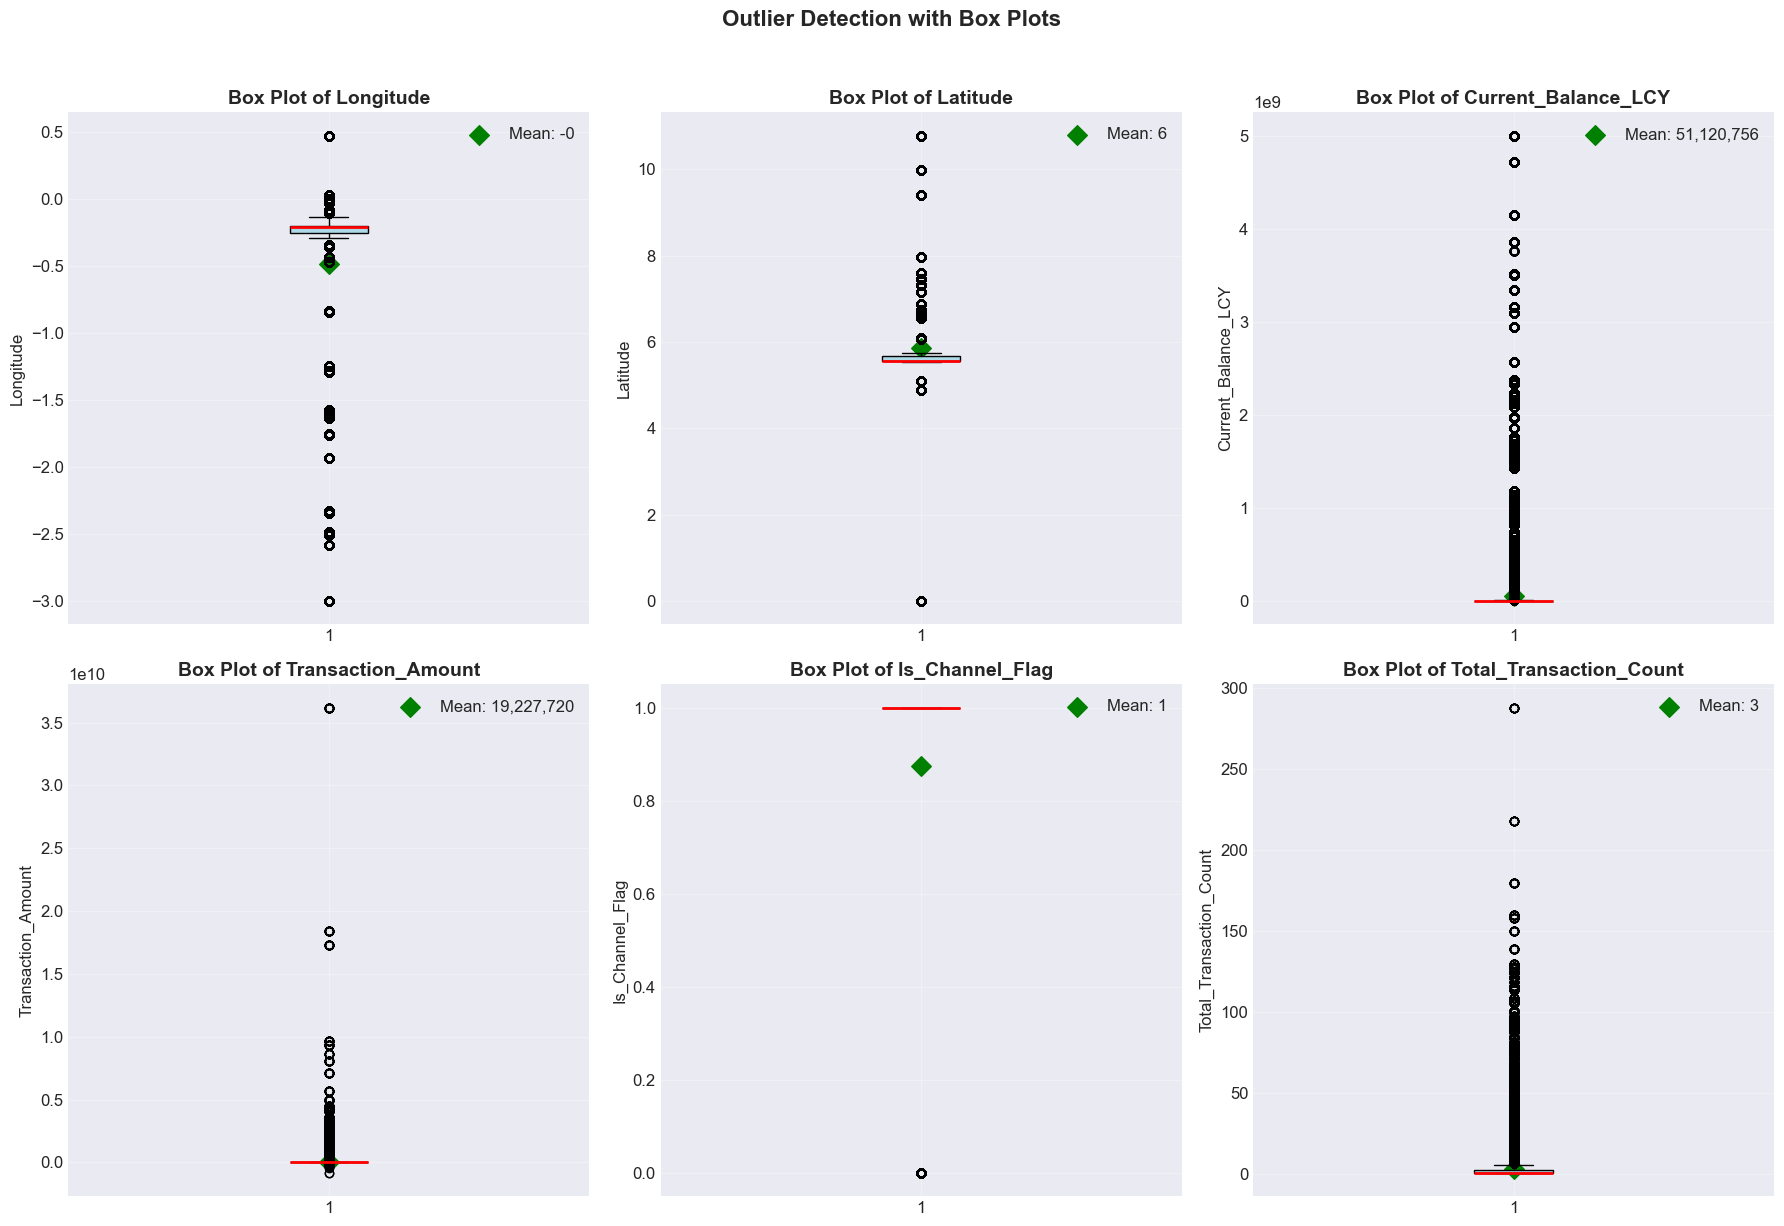

In [20]:
# Box plots for outlier detection
fig, axes = plt.subplots(2, 3, figsize=(18, 12))
axes = axes.flatten()

for idx, col in enumerate(numeric_to_plot[:6]):
    ax = axes[idx]
    
    # Box plot
    box = ax.boxplot(df[col].dropna(), patch_artist=True, vert=True)
    
    # Customize box plot
    box['boxes'][0].set_facecolor('lightblue')
    box['medians'][0].set_color('red')
    box['medians'][0].set_linewidth(2)
    
    # Add mean marker
    mean_val = df[col].mean()
    ax.scatter(1, mean_val, color='green', s=100, marker='D', label=f'Mean: {mean_val:,.0f}')
    
    ax.set_title(f'Box Plot of {col}', fontsize=14, fontweight='bold')
    ax.set_ylabel(col)
    ax.legend()
    ax.grid(True, alpha=0.3)

plt.suptitle('Outlier Detection with Box Plots', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

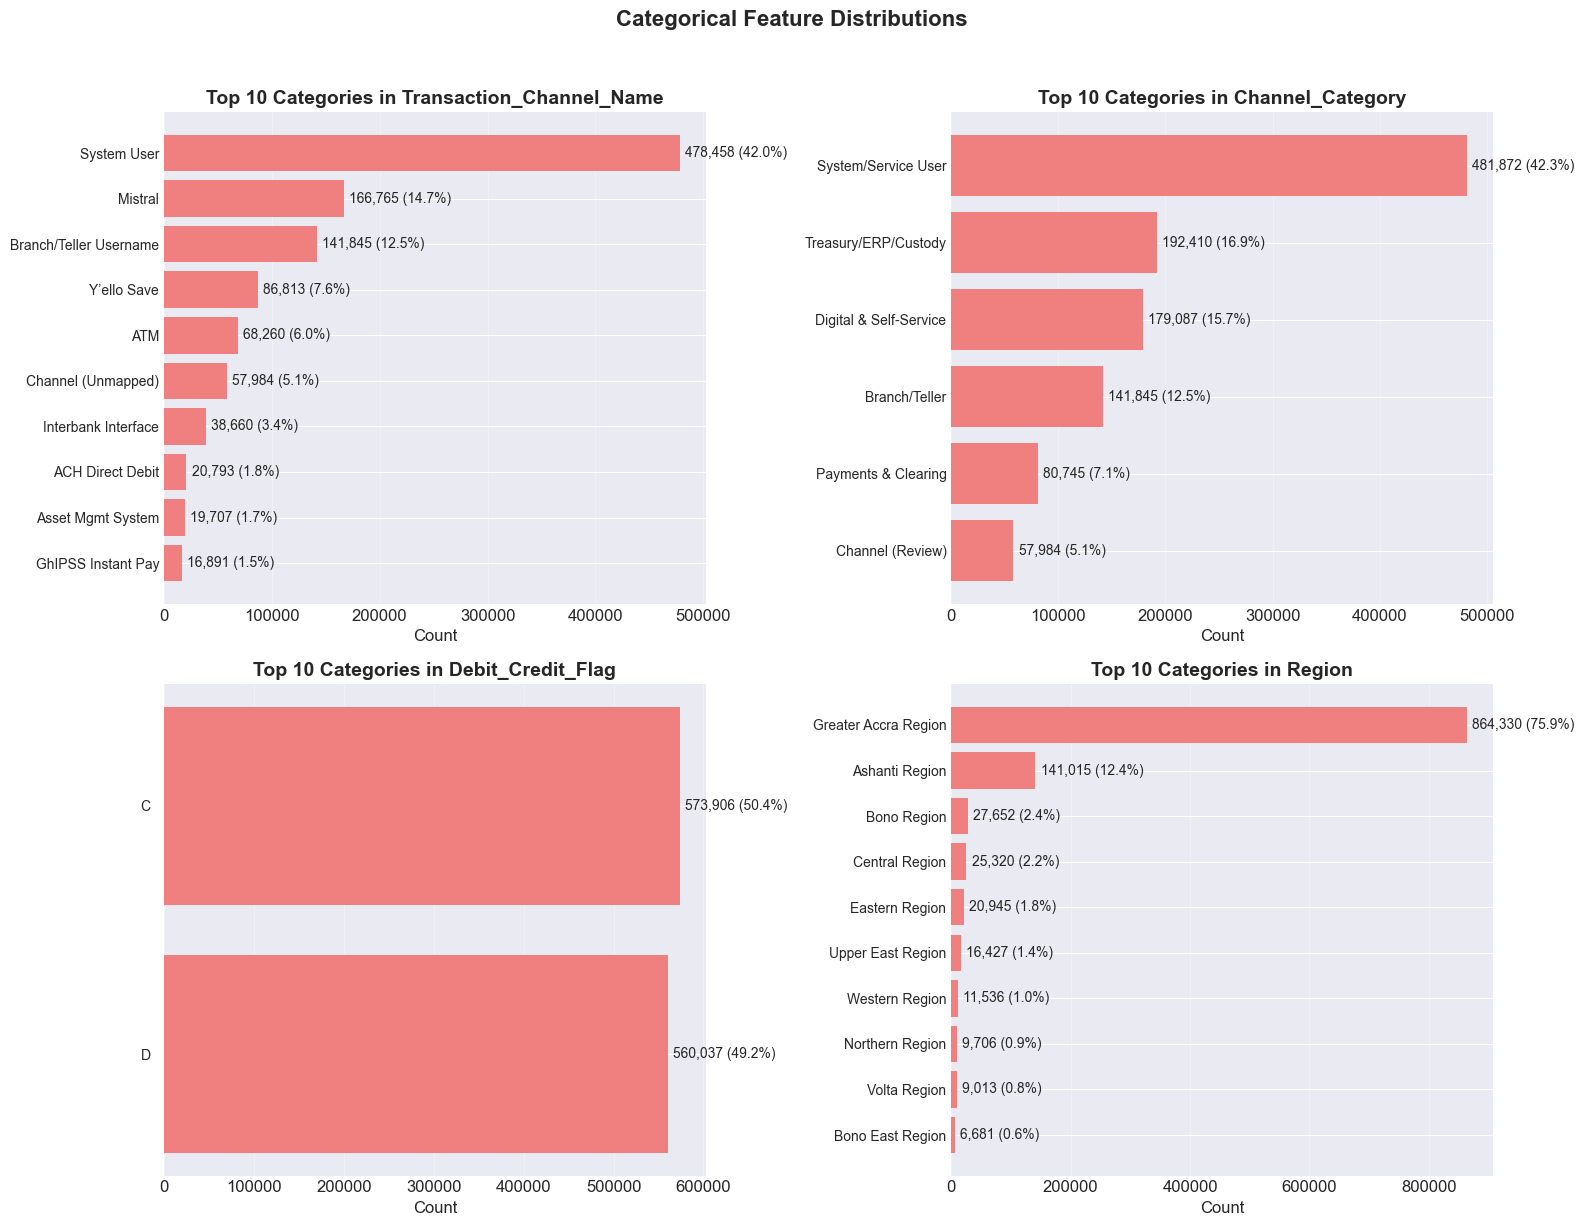

In [21]:
# Categorical distributions (top 10 for each)
categorical_to_plot = [col for col in categorical_cols if df[col].nunique() > 1 and df[col].nunique() <= 50]

fig, axes = plt.subplots(2, 2, figsize=(16, 12))
axes = axes.flatten()

for idx, col in enumerate(categorical_to_plot[:4]):
    ax = axes[idx]
    
    # Get top 10 categories
    top_categories = df[col].value_counts().nlargest(10)
    
    # Create bar plot
    bars = ax.barh(range(len(top_categories)), top_categories.values, color='lightcoral')
    
    # Add value labels
    for i, (value, bar) in enumerate(zip(top_categories.values, bars)):
        ax.text(value + max(top_categories.values) * 0.01, bar.get_y() + bar.get_height()/2,
                f'{value:,} ({value/len(df)*100:.1f}%)', va='center', fontsize=10)
    
    ax.set_yticks(range(len(top_categories)))
    ax.set_yticklabels(top_categories.index, fontsize=10)
    ax.set_xlabel('Count')
    ax.set_title(f'Top 10 Categories in {col}', fontsize=14, fontweight='bold')
    ax.invert_yaxis()  # Highest on top
    ax.grid(True, alpha=0.3, axis='x')

plt.suptitle('Categorical Feature Distributions', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Transaction-Specific Analysis

In [22]:
print("💳 TRANSACTION ANALYSIS")
print("="*60)

# Create Transaction_Date if not present
if 'Transaction_Date' not in df.columns:
    df['Transaction_Date'] = df['Last_Debit_Transaction_Date']
    print("Created Transaction_Date from Last_Debit_Transaction_Date")

# Extract date components for temporal analysis
df['Transaction_Year'] = df['Transaction_Date'].dt.year
df['Transaction_Month'] = df['Transaction_Date'].dt.month
df['Transaction_Day'] = df['Transaction_Date'].dt.day
df['Transaction_Weekday'] = df['Transaction_Date'].dt.day_name()
df['Transaction_Hour'] = df['Transaction_Date'].dt.hour

💳 TRANSACTION ANALYSIS
Created Transaction_Date from Last_Debit_Transaction_Date



💰 DEBIT vs CREDIT ANALYSIS


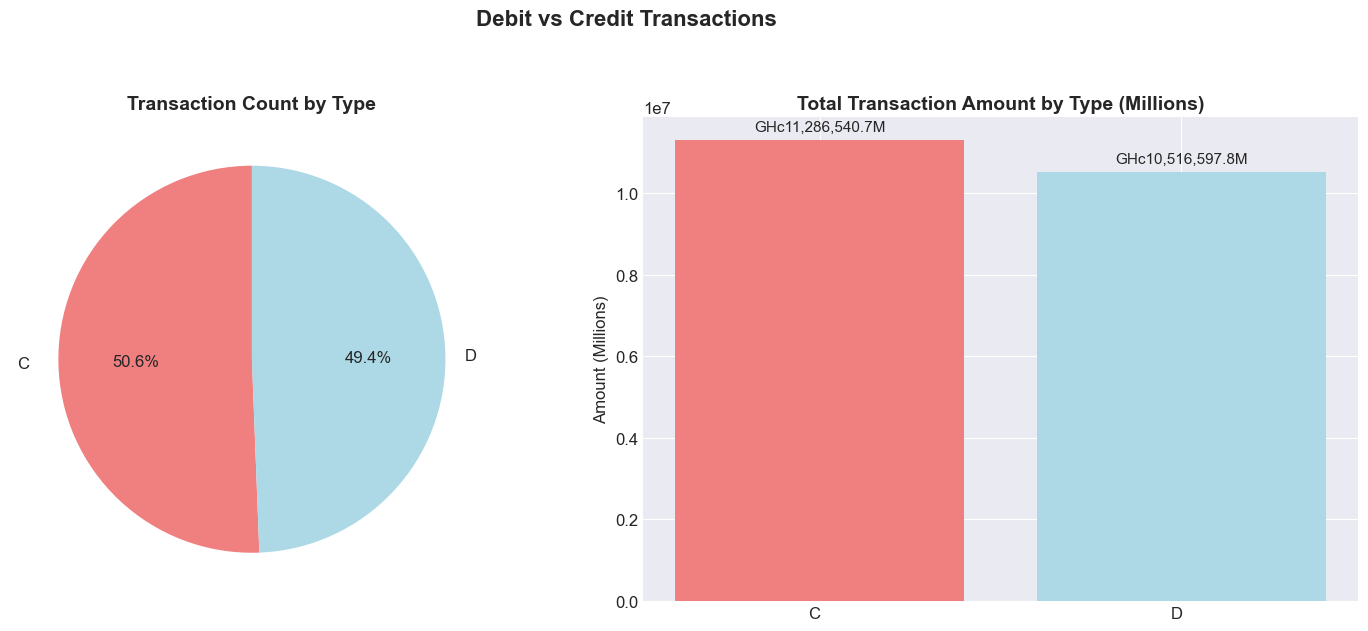


📊 Transaction Statistics:


,sum,mean,count
Debit_Credit_Flag,,,
C,11286540659067.65,19666183.42,573906
D,10516597750216.05,18778398.12,560037


In [23]:
# Debit vs Credit Analysis
print("\n💰 DEBIT vs CREDIT ANALYSIS")
if 'Debit_Credit_Flag' in df.columns:
    debit_credit_counts = df['Debit_Credit_Flag'].value_counts()
    debit_credit_amounts = df.groupby('Debit_Credit_Flag')['Transaction_Amount'].agg(['sum', 'mean', 'count'])
    
    fig, axes = plt.subplots(1, 2, figsize=(15, 6))
    
    # Count plot
    axes[0].pie(debit_credit_counts.values, labels=debit_credit_counts.index, 
                autopct='%1.1f%%', startangle=90, colors=['lightcoral', 'lightblue'])
    axes[0].set_title('Transaction Count by Type', fontsize=14, fontweight='bold')
    
    # Amount plot
    axes[1].bar(debit_credit_amounts.index, debit_credit_amounts['sum'] / 1e6, 
                color=['lightcoral', 'lightblue'])
    axes[1].set_title('Total Transaction Amount by Type (Millions)', fontsize=14, fontweight='bold')
    axes[1].set_ylabel('Amount (Millions)')
    
    # Add value labels
    for i, value in enumerate(debit_credit_amounts['sum'] / 1e6):
        axes[1].text(i, value + max(debit_credit_amounts['sum'] / 1e6) * 0.02, 
                    f'GHc{value:,.1f}M', ha='center', fontsize=11)
    
    plt.suptitle('Debit vs Credit Transactions', fontsize=16, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.show()
    
    # Display statistics
    print("\n📊 Transaction Statistics:")
    display(debit_credit_amounts)


🏦 TRANSACTION CHANNEL ANALYSIS
Total unique channels: 22

📋 Top 10 Channels by Transaction Count:


,Transaction_Count,Total_Amount,Avg_Amount,Std_Amount,Unique_Customers
Transaction_Channel_Name,,,,,
System User,478458,1501763985982.65,3138758.23,39911645.57,2614
Mistral,166765,618521984094.00,3708943.63,12777178.37,632
Branch/Teller Username,141845,10962326455070.55,77283841.20,310973977.95,1089
Y’ello Save,86813,74145164387.00,854079.05,2255555.64,907
ATM,68260,389792904077.00,5710414.65,26072717.93,401
Channel (Unmapped),57984,1663430831355.00,28687755.78,167501228.52,490
Interbank Interface,38660,813169232.00,21033.87,155021.74,387
ACH Direct Debit,20793,7949271363.00,382305.17,845427.47,187
Asset Mgmt System,19707,1066039820104.00,54094475.06,252957618.43,410


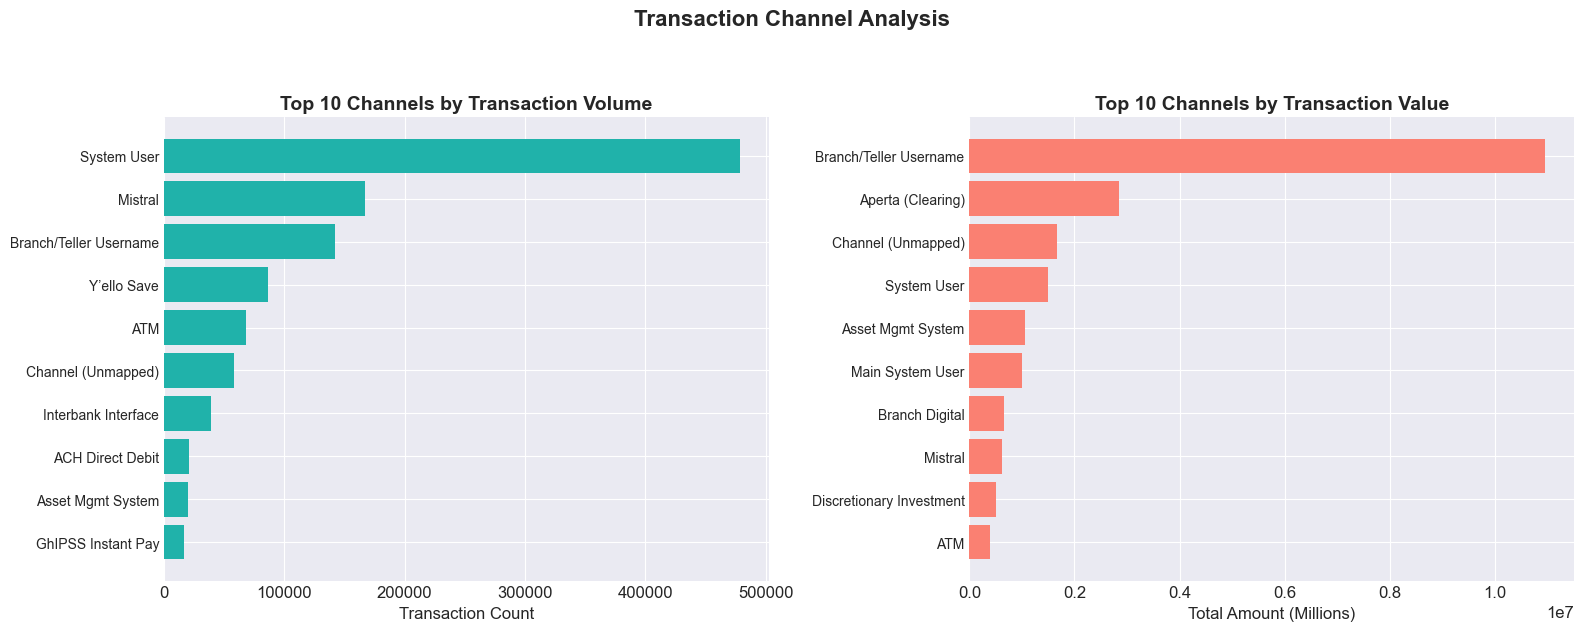

In [24]:
# Channel Analysis
print("\n🏦 TRANSACTION CHANNEL ANALYSIS")
if 'Transaction_Channel_Name' in df.columns:
    channel_stats = df.groupby('Transaction_Channel_Name').agg({
        'Transaction_Amount': ['count', 'sum', 'mean', 'std'],
        'Account_Number': 'nunique'
    }).round(2)
    
    channel_stats.columns = ['Transaction_Count', 'Total_Amount', 'Avg_Amount', 'Std_Amount', 'Unique_Customers']
    channel_stats = channel_stats.sort_values('Transaction_Count', ascending=False)
    
    print(f"Total unique channels: {len(channel_stats)}")
    print("\n📋 Top 10 Channels by Transaction Count:")
    display(channel_stats.head(10))
    
    # Visualization
    fig, axes = plt.subplots(1, 2, figsize=(16, 6))
    
    # Top channels by count
    top_channels = channel_stats.head(10)
    axes[0].barh(range(len(top_channels)), top_channels['Transaction_Count'], color='lightseagreen')
    axes[0].set_yticks(range(len(top_channels)))
    axes[0].set_yticklabels(top_channels.index, fontsize=10)
    axes[0].set_xlabel('Transaction Count')
    axes[0].set_title('Top 10 Channels by Transaction Volume', fontsize=14, fontweight='bold')
    axes[0].invert_yaxis()
    
    # Top channels by amount
    top_channels_amount = channel_stats.sort_values('Total_Amount', ascending=False).head(10)
    axes[1].barh(range(len(top_channels_amount)), top_channels_amount['Total_Amount'] / 1e6, color='salmon')
    axes[1].set_yticks(range(len(top_channels_amount)))
    axes[1].set_yticklabels(top_channels_amount.index, fontsize=10)
    axes[1].set_xlabel('Total Amount (Millions)')
    axes[1].set_title('Top 10 Channels by Transaction Value', fontsize=14, fontweight='bold')
    axes[1].invert_yaxis()
    
    plt.suptitle('Transaction Channel Analysis', fontsize=16, fontweight='bold', y=1.05)
    plt.tight_layout()
    plt.show()

Customer Behavior Analysis

In [25]:
print("👤 CUSTOMER BEHAVIOR ANALYSIS")
print("="*60)

# Customer-level statistics
if 'Account_Number' in df.columns:
    customer_stats = df.groupby('Account_Number').agg({
        'Transaction_Amount': ['count', 'sum', 'mean', 'std', 'min', 'max'],
        'Transaction_Channel_Name': lambda x: x.nunique(),
        'Customer_Branch_Code': lambda x: x.nunique(),
        'Transaction_Date': ['min', 'max']
    }).round(2)
    
    # Flatten column names
    customer_stats.columns = ['Transaction_Count', 'Total_Amount', 'Avg_Amount', 'Std_Amount',
                             'Min_Amount', 'Max_Amount', 'Unique_Channels', 'Unique_Branches',
                             'First_Transaction', 'Last_Transaction']
    
    # Calculate customer lifetime
    customer_stats['Customer_Lifetime_Days'] = (customer_stats['Last_Transaction'] - 
                                               customer_stats['First_Transaction']).dt.days
    
    print(f"📊 Total unique customers: {len(customer_stats):,}")
    print("\n📋 Customer Statistics Summary:")
    display(customer_stats.describe().style.background_gradient(cmap='YlOrRd'))

👤 CUSTOMER BEHAVIOR ANALYSIS
📊 Total unique customers: 3,230

📋 Customer Statistics Summary:


,Transaction_Count,Total_Amount,Avg_Amount,Std_Amount,Min_Amount,Max_Amount,Unique_Channels,Unique_Branches,First_Transaction,Last_Transaction,Customer_Lifetime_Days
count,3230.000000,3230.000000,2819.000000,2805.000000,2819.000000,2819.000000,3230.000000,3230.000000,3230,3230,3230.000000
mean,351.065944,6750197649.933034,4507068.343547,11742311.482114,-829002.163214,89170414.943242,2.594737,1.000000,2024-04-22 05:24:27.208049664,2024-08-10 08:13:03.057585152,109.232198
min,0.000000,-892650.000000,-81150.000000,0.000000,-831033520.650000,-81150.000000,0.000000,1.000000,2020-01-09 00:02:47,2020-01-09 22:42:32,0.000000
25%,33.000000,2420.000000,257.685000,8.750000,10.000000,2062.000000,1.000000,1.000000,2024-01-04 06:00:29,2024-03-26 05:55:42.249999872,0.000000
50%,242.000000,2742262.000000,97652.450000,148521.120000,21.000000,515500.000000,2.000000,1.000000,2024-11-01 07:58:42.500000,2025-01-28 11:24:58.500000,27.000000
75%,330.000000,132705381.750000,670919.455000,1142689.990000,206.000000,4536400.000000,3.000000,1.000000,2025-01-30 00:39:07.500000,2025-09-29 23:49:24.750000128,212.000000
max,5632.000000,1774747992017.500000,717069895.760000,3817765609.710000,3368865.000000,36188100000.000000,15.000000,1.000000,2025-10-30 16:12:18,2025-10-30 23:59:49,2056.000000
std,605.411912,72668672995.518005,35902798.249444,124034114.018904,23239425.254739,1133796201.011108,2.366308,0.000000,nan,nan,190.955142


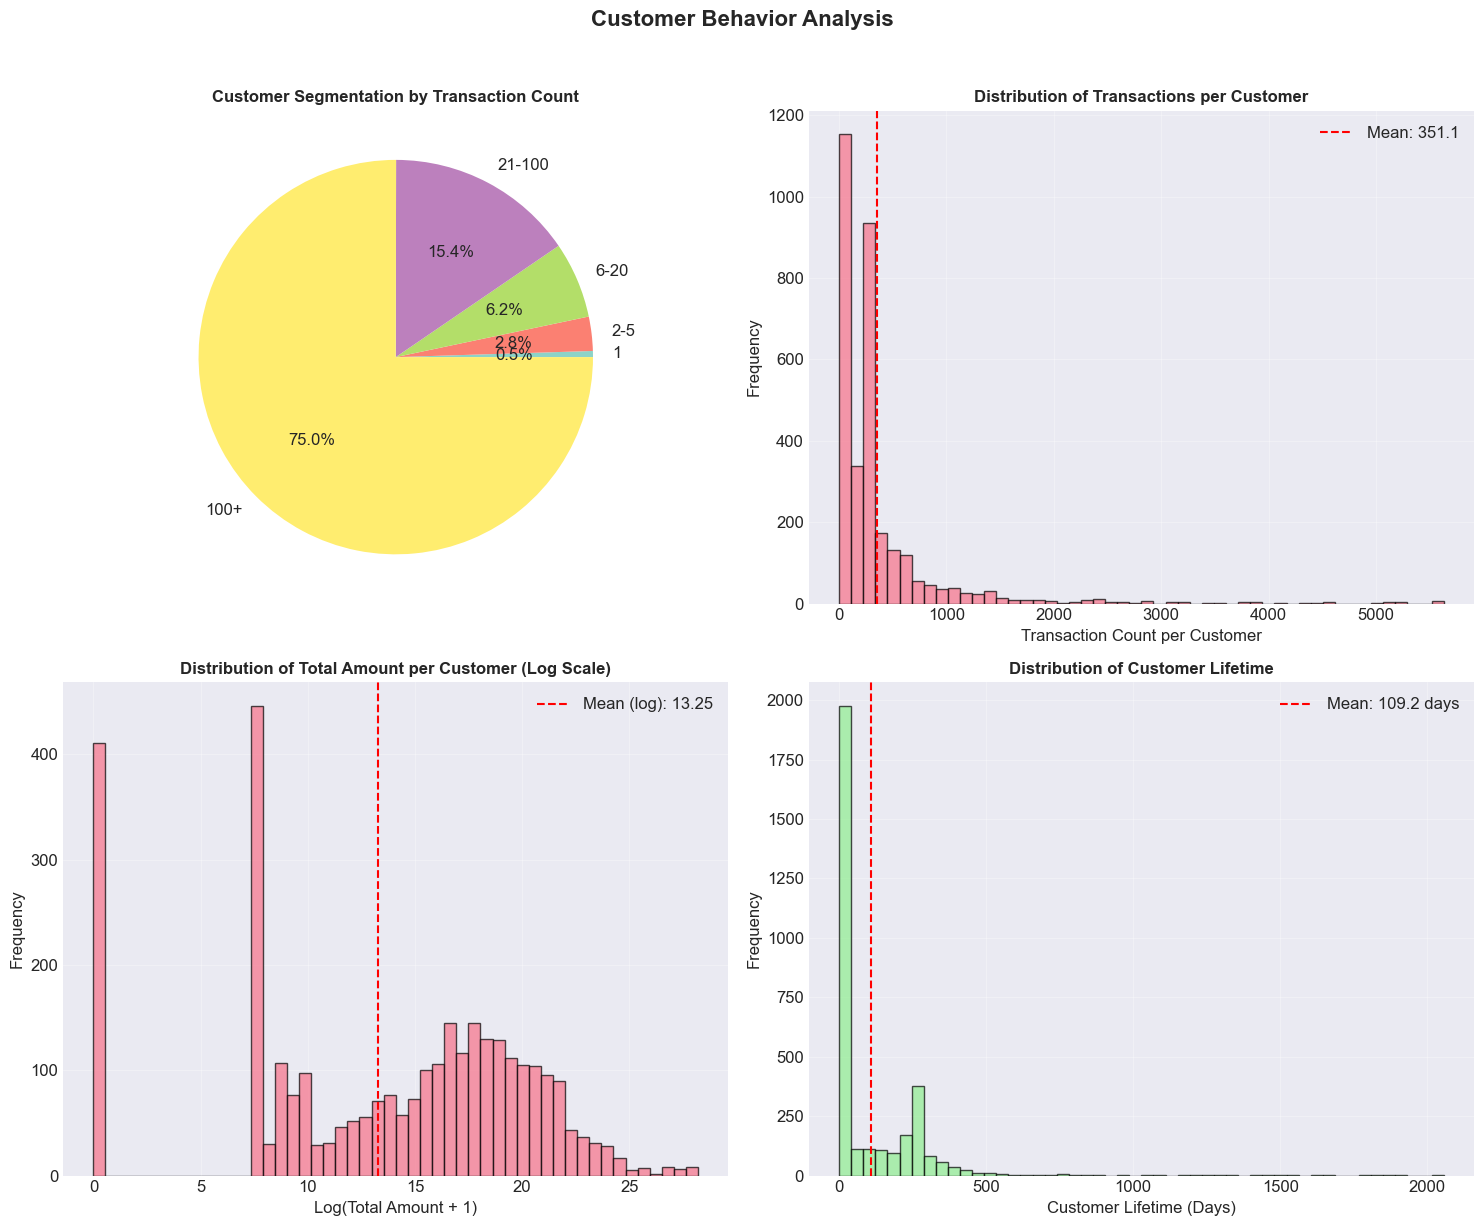

In [26]:
# Customer segmentation by transaction count
transaction_segments = pd.cut(customer_stats['Transaction_Count'], 
                                  bins=[0, 1, 5, 20, 100, float('inf')],
                                  labels=['1', '2-5', '6-20', '21-100', '100+'])
    
segment_summary = transaction_segments.value_counts().sort_index()
    
fig, axes = plt.subplots(2, 2, figsize=(15, 12))
    
    # Segment distribution
axes[0,0].pie(segment_summary.values, labels=segment_summary.index, autopct='%1.1f%%',
                  colors=plt.cm.Set3(np.linspace(0, 1, len(segment_summary))))
axes[0,0].set_title('Customer Segmentation by Transaction Count', fontsize=12, fontweight='bold')
    
# Transaction count distribution
axes[0,1].hist(customer_stats['Transaction_Count'], bins=50, edgecolor='black', alpha=0.7)
axes[0,1].axvline(customer_stats['Transaction_Count'].mean(), color='red', linestyle='--', 
                     label=f'Mean: {customer_stats["Transaction_Count"].mean():.1f}')
axes[0,1].set_xlabel('Transaction Count per Customer')
axes[0,1].set_ylabel('Frequency')
axes[0,1].set_title('Distribution of Transactions per Customer', fontsize=12, fontweight='bold')
axes[0,1].legend()
axes[0,1].grid(alpha=0.3)
    
# Total amount distribution
axes[1,0].hist(np.log1p(customer_stats['Total_Amount']), bins=50, edgecolor='black', alpha=0.7)
axes[1,0].axvline(np.log1p(customer_stats['Total_Amount']).mean(), color='red', linestyle='--',
                     label=f'Mean (log): {np.log1p(customer_stats["Total_Amount"]).mean():.2f}')
axes[1,0].set_xlabel('Log(Total Amount + 1)')
axes[1,0].set_ylabel('Frequency')
axes[1,0].set_title('Distribution of Total Amount per Customer (Log Scale)', fontsize=12, fontweight='bold')
axes[1,0].legend()
axes[1,0].grid(alpha=0.3)
    
# Customer lifetime distribution
if customer_stats['Customer_Lifetime_Days'].notnull().any():
        axes[1,1].hist(customer_stats['Customer_Lifetime_Days'].dropna(), bins=50, 
                       edgecolor='black', alpha=0.7, color='lightgreen')
        axes[1,1].axvline(customer_stats['Customer_Lifetime_Days'].mean(), color='red', linestyle='--',
                         label=f'Mean: {customer_stats["Customer_Lifetime_Days"].mean():.1f} days')
        axes[1,1].set_xlabel('Customer Lifetime (Days)')
        axes[1,1].set_ylabel('Frequency')
        axes[1,1].set_title('Distribution of Customer Lifetime', fontsize=12, fontweight='bold')
        axes[1,1].legend()
        axes[1,1].grid(alpha=0.3)
    
plt.suptitle('Customer Behavior Analysis', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Geographic Analysis

In [27]:
print("🌍 GEOGRAPHIC ANALYSIS")
print("="*60)

# Branch analysis
if 'Customer_Branch_Code' in df.columns:
    branch_stats = df.groupby('Customer_Branch_Code').agg({
        'Transaction_Amount': ['count', 'sum', 'mean'],
        'Account_Number': 'nunique',
        'Region': lambda x: x.mode().iloc[0] if not x.mode().empty else 'Unknown'
    }).round(2)
    
    branch_stats.columns = ['Transaction_Count', 'Total_Amount', 'Avg_Amount', 'Unique_Customers', 'Region']
    branch_stats = branch_stats.sort_values('Transaction_Count', ascending=False)
    
    print(f"📊 Total unique branches: {len(branch_stats):,}")
    print("\n📋 Top 10 Branches by Transaction Volume:")
    display(branch_stats.head(10))

🌍 GEOGRAPHIC ANALYSIS
📊 Total unique branches: 94

📋 Top 10 Branches by Transaction Volume:


,Transaction_Count,Total_Amount,Avg_Amount,Unique_Customers,Region
Customer_Branch_Code,,,,,
83,190597,29705337155.00,155854.17,727,Greater Accra Region
84,134416,45188161755.00,336181.42,813,Greater Accra Region
1,98841,4083357927155.35,41312389.87,61,Greater Accra Region
20,37476,608375201763.35,16233728.30,28,Greater Accra Region
27,36906,6489474599453.00,175837928.78,22,Greater Accra Region
123,21281,106279571824.80,4994106.10,34,Greater Accra Region
26,20597,92527138240.00,4492262.87,43,Greater Accra Region
608,20476,261817994431.00,12786579.14,35,Ashanti Region
605,19985,776182416547.00,38838249.51,36,Ashanti Region


In [39]:
# Geographic visualization if coordinates exist
if all(col in df.columns for col in ['Longitude', 'Latitude']):
        # Aggregate by coordinates (average location per branch)
        geo_stats = df.groupby('Customer_Branch_Code').agg({
            'Longitude': 'mean',
            'Latitude': 'mean',
            'Transaction_Amount': 'count'
        }).reset_index()
        
# Interactive map
fig = px.scatter_mapbox(geo_stats, 
                            lon="Longitude", 
                            lat="Latitude", 
                            size="Transaction_Amount",
                            hover_name="Customer_Branch_Code",
                            hover_data=["Transaction_Amount"],
                            zoom=5,
                            title="Branch Locations by Transaction Volume",
                            size_max=50,
                            color="Transaction_Amount",
                            color_continuous_scale=px.colors.sequential.Viridis)
    
fig.update_layout(mapbox_style="open-street-map")
fig.update_layout(margin={"r":0,"t":40,"l":0,"b":0})
fig.show()

=== DIAGNOSTIC CHECK ===
DataFrame shape: (1138311, 22)
Columns: ['Account_Number', 'Customer_Branch_Code', 'Branch_Name', 'Longitude', 'Latitude', 'End_of_Month', 'Current_Balance_LCY', 'Transaction_Amount', 'Last_Debit_Transaction_Date', 'Last_Credit_Transaction_Date', 'Transaction_Channel_Name', 'Channel_Category', 'Is_Channel_Flag', 'Total_Transaction_Count', 'Debit_Credit_Flag', 'Region', 'Transaction_Date', 'Transaction_Year', 'Transaction_Month', 'Transaction_Day', 'Transaction_Weekday', 'Transaction_Hour']

✅ All required columns found!

=== DATA PREPARATION ===
Removed 0 rows with missing coordinates

Region value types: {<class 'str'>}
Unique Region values (first 10): ['Greater Accra Region' 'Ashanti Region' 'Volta Region' 'Northern Region'
 'Central Region' 'Bono East Region' 'Western Region' 'Bono Region'
 'Upper East Region' 'Eastern Region']
Any None values in Region? False

Final plotting dataframe shape: (94, 5)
Unique regions in plot data: 13

=== CREATING VISUALIZATIO

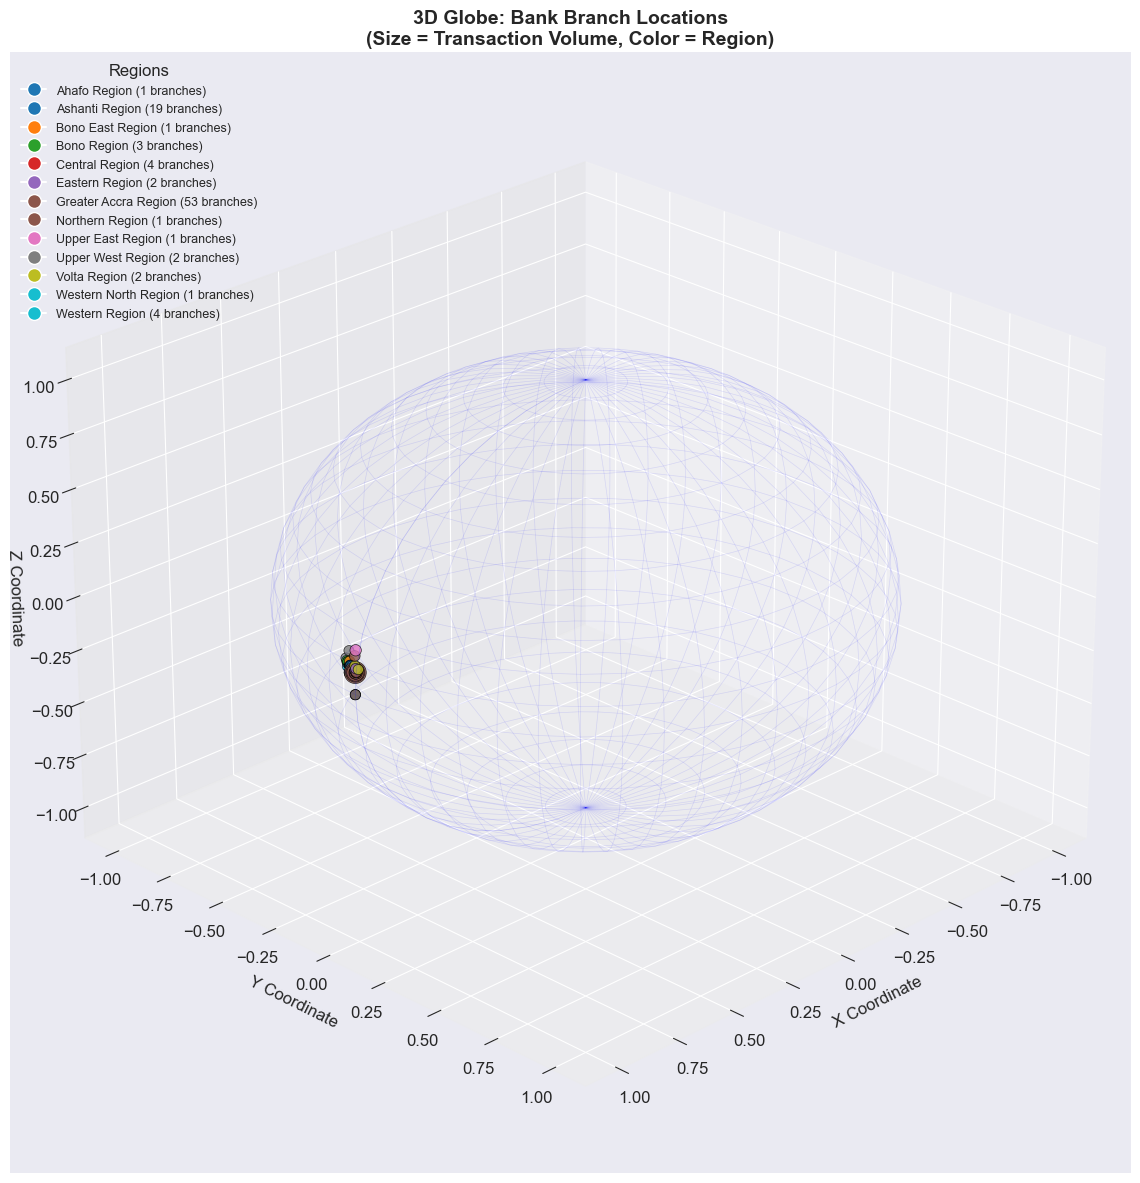

✅ 3D visualization saved as 'branch_locations_3d.png'


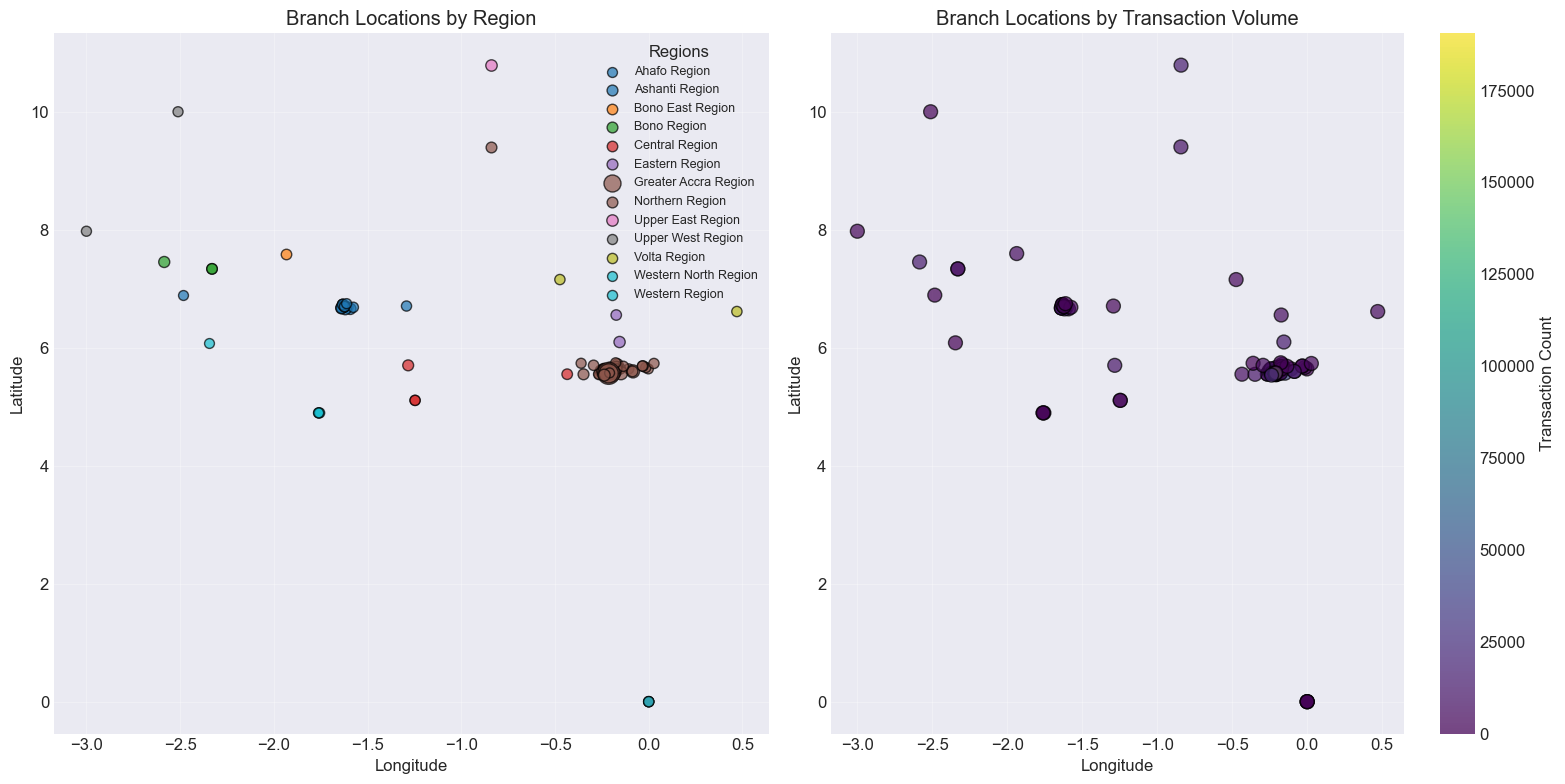

✅ 2D visualizations saved as 'branch_locations_2d.png'

SUMMARY STATISTICS
Total branches plotted: 94
Total transaction records: 1,133,943
Average transactions per branch: 12063

Branches by Region:
  - Ahafo Region: 1 branches, 833 transactions
  - Ashanti Region: 19 branches, 140,308 transactions
  - Bono East Region: 1 branches, 6,607 transactions
  - Bono Region: 3 branches, 27,350 transactions
  - Central Region: 4 branches, 25,062 transactions
  - Eastern Region: 2 branches, 20,786 transactions
  - Greater Accra Region: 53 branches, 862,041 transactions
  - Northern Region: 1 branches, 9,515 transactions
  - Upper East Region: 1 branches, 16,331 transactions
  - Upper West Region: 2 branches, 4,316 transactions
  - Volta Region: 2 branches, 8,889 transactions
  - Western North Region: 1 branches, 453 transactions
  - Western Region: 4 branches, 11,452 transactions

✅ Geographic data saved as 'branch_geographic_data.csv'


In [29]:
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D
import numpy as np
import pandas as pd

# Diagnostic check first
print("=== DIAGNOSTIC CHECK ===")
print(f"DataFrame shape: {df.shape}")
print(f"Columns: {df.columns.tolist()}")

# Check required columns
required_columns = ['Longitude', 'Latitude', 'Customer_Branch_Code', 'Region', 'Transaction_Amount']
missing_cols = [col for col in required_columns if col not in df.columns]

if missing_cols:
    print(f"\n❌ Missing required columns: {missing_cols}")
    print("\nAvailable columns:")
    for i, col in enumerate(df.columns):
        print(f"  {i+1}. {col}")
else:
    print("\n✅ All required columns found!")
    
    # Clean and prepare data
    print("\n=== DATA PREPARATION ===")
    
    # Create a clean copy
    df_clean = df.copy()
    
    # Clean Region column - replace None/NaN with 'Unknown'
    df_clean['Region'] = df_clean['Region'].fillna('Unknown Region')
    df_clean['Region'] = df_clean['Region'].replace([None, np.nan, 'nan', 'None', 'null', ''], 'Unknown Region')
    
    # Convert Region to string
    df_clean['Region'] = df_clean['Region'].astype(str)
    
    # Clean coordinates
    df_clean['Longitude'] = pd.to_numeric(df_clean['Longitude'], errors='coerce')
    df_clean['Latitude'] = pd.to_numeric(df_clean['Latitude'], errors='coerce')
    
    # Remove rows with missing coordinates
    initial_rows = len(df_clean)
    df_clean = df_clean.dropna(subset=['Longitude', 'Latitude'])
    print(f"Removed {initial_rows - len(df_clean)} rows with missing coordinates")
    
    # Check Region values
    print(f"\nRegion value types: {set(type(x) for x in df_clean['Region'].unique())}")
    print(f"Unique Region values (first 10): {df_clean['Region'].unique()[:10]}")
    print(f"Any None values in Region? {df_clean['Region'].isnull().any()}")
    
    # Simple aggregation - avoid lambda functions that might cause issues
    try:
        # Group by branch code
        geo_stats = df_clean.groupby('Customer_Branch_Code').agg({
            'Longitude': 'mean',
            'Latitude': 'mean',
            'Transaction_Amount': 'count'
        }).reset_index()
        
        # Get the most common region for each branch
        region_mode = df_clean.groupby('Customer_Branch_Code')['Region'].agg(
            lambda x: x.mode()[0] if not x.mode().empty else 'Unknown Region'
        ).reset_index()
        
        # Merge region information
        geo_stats = pd.merge(geo_stats, region_mode, on='Customer_Branch_Code', how='left')
        
        # Fill any missing regions
        geo_stats['Region'] = geo_stats['Region'].fillna('Unknown Region')
        
        # Rename columns
        geo_stats = geo_stats.rename(columns={
            'Transaction_Amount': 'Transaction_Count',
            'Longitude': 'longitude',
            'Latitude': 'latitude'
        })
        
        # Create plotting dataframe
        df_plot = geo_stats.copy()
        
        # Final cleaning
        df_plot['Region'] = df_plot['Region'].astype(str)
        df_plot = df_plot.dropna(subset=['longitude', 'latitude', 'Region'])
        
        # Check for any remaining issues
        print(f"\nFinal plotting dataframe shape: {df_plot.shape}")
        print(f"Unique regions in plot data: {df_plot['Region'].nunique()}")
        
        if len(df_plot) == 0:
            print("❌ No valid data to plot after cleaning")
        else:
            print("\n=== CREATING VISUALIZATIONS ===")
            
            # Extract data
            lons = df_plot['longitude'].values
            lats = df_plot['latitude'].values
            regions = df_plot['Region'].values
            
            # Convert to 3D coordinates
            lons_rad = np.radians(lons)
            lats_rad = np.radians(lats)
            x = np.cos(lats_rad) * np.cos(lons_rad)
            y = np.cos(lats_rad) * np.sin(lons_rad)
            z = np.sin(lats_rad)
            
            # Get unique regions safely
            regions_str = np.array([str(r) if r is not None else 'Unknown' for r in regions])
            unique_regions = np.unique(regions_str)
            
            print(f"Plotting {len(df_plot)} branch locations")
            print(f"Unique regions: {len(unique_regions)}")
            
            # Create color map
            color_map = plt.cm.get_cmap('tab10', len(unique_regions))
            region_colors = {region: color_map(i) for i, region in enumerate(unique_regions)}
            colors = [region_colors[r] for r in regions_str]
            
            # 1. Create 3D plot
            fig = plt.figure(figsize=(14, 12))
            ax = fig.add_subplot(111, projection='3d')
            
            # Size markers by transaction count
            transaction_sizes = df_plot['Transaction_Count'].values
            if transaction_sizes.max() > transaction_sizes.min():
                marker_sizes = 50 + (transaction_sizes / transaction_sizes.max()) * 200
            else:
                marker_sizes = 100
            
            # Scatter plot
            scatter = ax.scatter(x, y, z, c=colors, s=marker_sizes, alpha=0.8, 
                                edgecolors='black', linewidth=0.5)
            
            # Add Earth wireframe
            u, v = np.mgrid[0:2*np.pi:50j, 0:np.pi:25j]
            sphere_x = np.cos(u) * np.sin(v)
            sphere_y = np.sin(u) * np.sin(v)
            sphere_z = np.cos(v)
            ax.plot_wireframe(sphere_x, sphere_y, sphere_z, color='blue', 
                            alpha=0.1, linewidth=0.5)
            
            # Labels and title
            ax.set_xlabel('X Coordinate')
            ax.set_ylabel('Y Coordinate')
            ax.set_zlabel('Z Coordinate')
            ax.set_title('3D Globe: Bank Branch Locations\n(Size = Transaction Volume, Color = Region)', 
                        fontsize=14, fontweight='bold')
            
            # Add legend
            legend_elements = []
            for i, region in enumerate(unique_regions):
                count = np.sum(regions_str == region)
                legend_elements.append(
                    plt.Line2D([0], [0], marker='o', color='w', 
                              label=f'{region} ({count} branches)',
                              markerfacecolor=color_map(i), markersize=10)
                )
            
            ax.legend(handles=legend_elements, loc='upper left', 
                     title='Regions', fontsize=9, bbox_to_anchor=(0, 1))
            
            ax.grid(True, alpha=0.3)
            ax.view_init(elev=25, azim=45)
            
            plt.tight_layout()
            plt.savefig('branch_locations_3d.png', dpi=150, bbox_inches='tight')
            plt.show()
            print("✅ 3D visualization saved as 'branch_locations_3d.png'")
            
            # 2. Create 2D plot (simpler, more readable)
            fig2, (ax1, ax2) = plt.subplots(1, 2, figsize=(16, 8))
            
            # Left subplot: Colored by region
            for i, region in enumerate(unique_regions):
                mask = regions_str == region
                ax1.scatter(lons[mask], lats[mask], 
                          color=color_map(i), s=marker_sizes[mask], 
                          alpha=0.7, label=f'{region}', 
                          edgecolors='black')
            
            ax1.set_xlabel('Longitude')
            ax1.set_ylabel('Latitude')
            ax1.set_title('Branch Locations by Region')
            ax1.legend(title='Regions', fontsize=9)
            ax1.grid(True, alpha=0.3)
            
            # Right subplot: Colored by transaction volume
            scatter2 = ax2.scatter(lons, lats, c=transaction_sizes, 
                                 cmap='viridis', s=100, alpha=0.7,
                                 edgecolors='black')
            ax2.set_xlabel('Longitude')
            ax2.set_ylabel('Latitude')
            ax2.set_title('Branch Locations by Transaction Volume')
            ax2.grid(True, alpha=0.3)
            plt.colorbar(scatter2, ax=ax2, label='Transaction Count')
            
            plt.tight_layout()
            plt.savefig('branch_locations_2d.png', dpi=150, bbox_inches='tight')
            plt.show()
            print("✅ 2D visualizations saved as 'branch_locations_2d.png'")
            
            # 3. Summary statistics
            print("\n" + "="*60)
            print("SUMMARY STATISTICS")
            print("="*60)
            print(f"Total branches plotted: {len(df_plot)}")
            print(f"Total transaction records: {transaction_sizes.sum():,}")
            print(f"Average transactions per branch: {transaction_sizes.mean():.0f}")
            
            print("\nBranches by Region:")
            for region in unique_regions:
                count = np.sum(regions_str == region)
                region_tx = transaction_sizes[regions_str == region].sum()
                print(f"  - {region}: {count} branches, {region_tx:,} transactions")
            
            # Save data for further analysis
            df_plot.to_csv('branch_geographic_data.csv', index=False)
            print("\n✅ Geographic data saved as 'branch_geographic_data.csv'")
            
    except Exception as e:
        print(f"\n❌ Error during processing: {e}")
        print("\nDebug information:")
        print(f"df_clean shape: {df_clean.shape if 'df_clean' in locals() else 'Not created'}")
        print(f"df_clean Region dtype: {df_clean['Region'].dtype if 'df_clean' in locals() else 'N/A'}")
        
        # Try a simpler approach
        print("\nTrying simpler visualization...")
        try:
            # Simple scatter plot
            fig, ax = plt.subplots(figsize=(12, 8))
            
            # Plot all points with same color
            ax.scatter(df_clean['Longitude'], df_clean['Latitude'], 
                      alpha=0.5, s=10, color='blue')
            
            ax.set_xlabel('Longitude')
            ax.set_ylabel('Latitude')
            ax.set_title('Branch Locations (Simple View)')
            ax.grid(True, alpha=0.3)
            
            plt.tight_layout()
            plt.savefig('simple_branch_map.png', dpi=150, bbox_inches='tight')
            plt.show()
            print("✅ Simple map saved as 'simple_branch_map.png'")
            
        except Exception as e2:
            print(f"❌ Even simple plot failed: {e2}")

📊 Total unique regions: 13

📋 Regional Statistics:


,Transaction_Count,Total_Amount,Avg_Amount,Unique_Customers,Unique_Branches
Region,,,,,
Greater Accra Region,862041,16441783259077.95,19073087.31,2453,53
Ashanti Region,140308,3477714291502.50,24786286.54,340,19
Bono Region,27350,78280906164.00,2862190.35,91,3
Central Region,25062,95441115804.00,3808200.30,89,4
Eastern Region,20786,52654167096.00,2533155.35,62,2
Upper East Region,16331,24898495047.00,1524615.46,38,1
Western Region,11452,100035747315.25,8735220.69,36,4
Northern Region,9515,718924337889.00,75556945.65,36,1
Volta Region,8889,46222241454.00,5199937.16,34,2


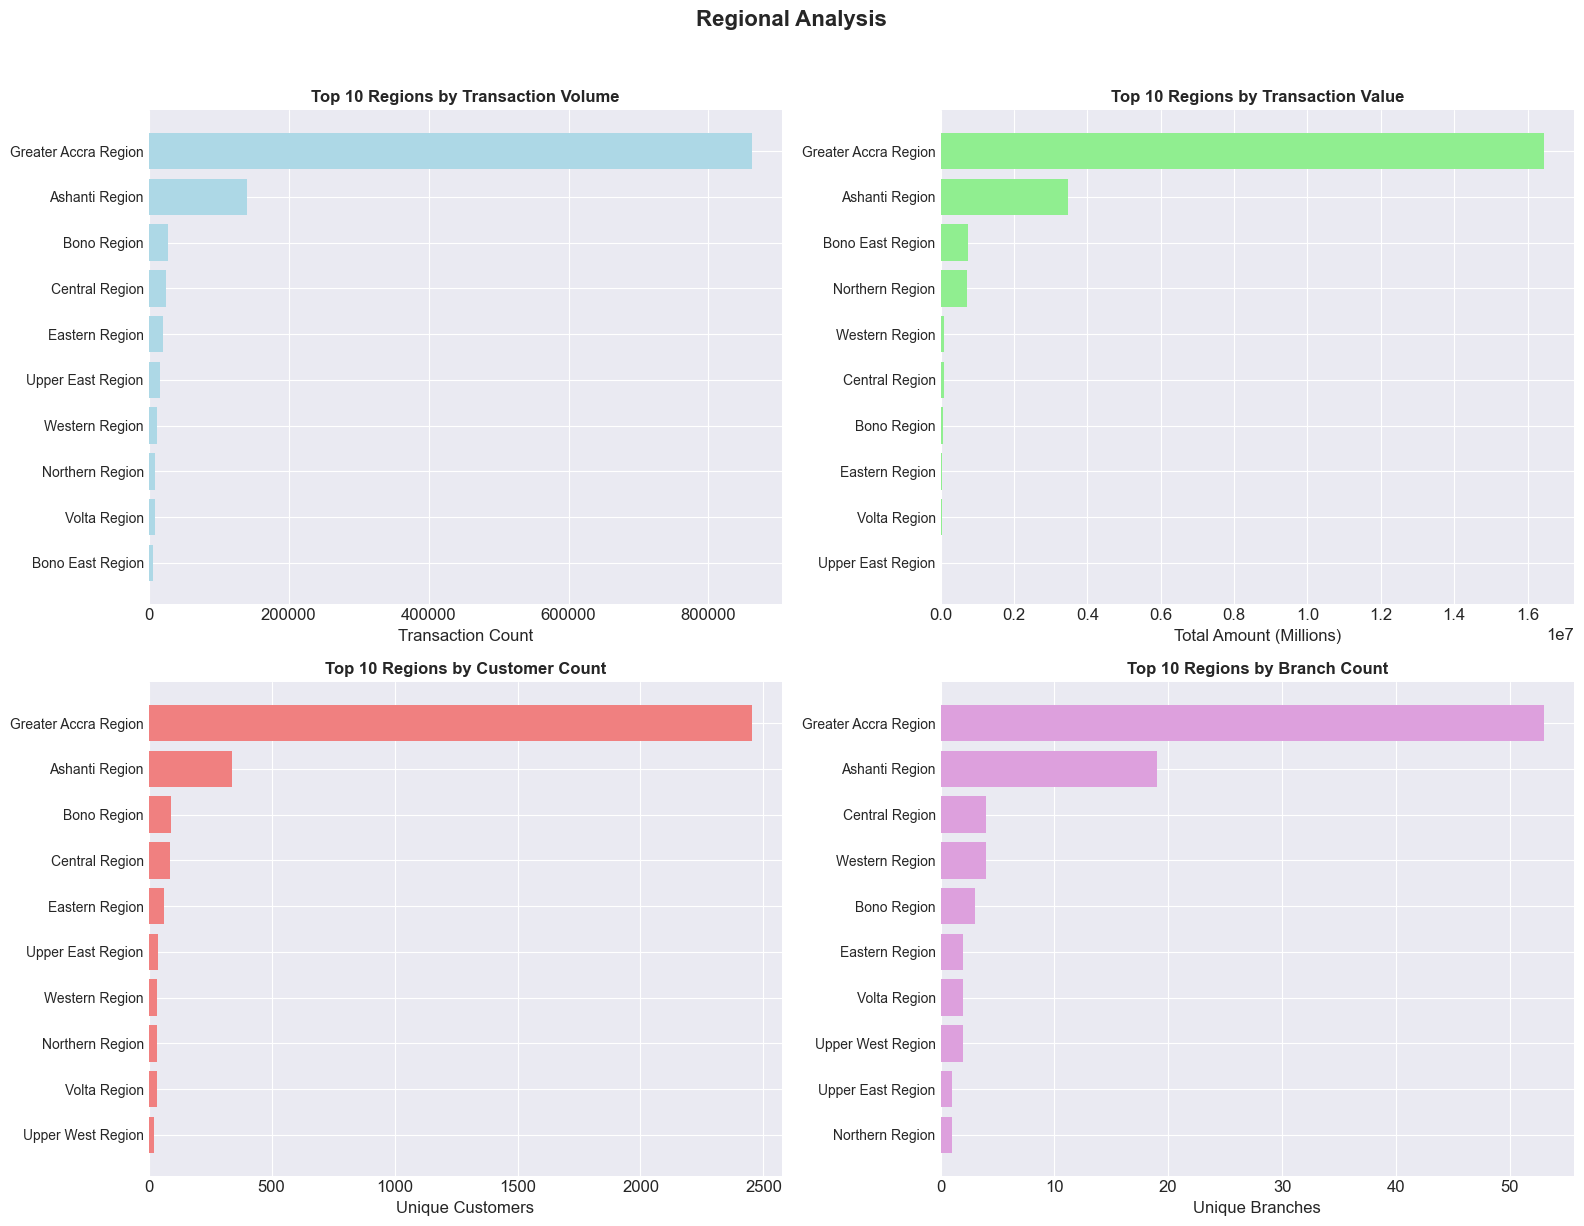

In [30]:
# Regional analysis
if 'Region' in df.columns:
    regional_stats = df.groupby('Region').agg({
        'Transaction_Amount': ['count', 'sum', 'mean'],
        'Account_Number': 'nunique',
        'Customer_Branch_Code': 'nunique'
    }).round(2)
    
    regional_stats.columns = ['Transaction_Count', 'Total_Amount', 'Avg_Amount', 
                             'Unique_Customers', 'Unique_Branches']
    regional_stats = regional_stats.sort_values('Transaction_Count', ascending=False)
    
    print(f"📊 Total unique regions: {len(regional_stats):,}")
    print("\n📋 Regional Statistics:")
    display(regional_stats)
    
    # Regional visualization
    fig, axes = plt.subplots(2, 2, figsize=(16, 12))
    
    # Transaction count by region
    top_regions = regional_stats.nlargest(10, 'Transaction_Count')
    axes[0,0].barh(range(len(top_regions)), top_regions['Transaction_Count'], color='lightblue')
    axes[0,0].set_yticks(range(len(top_regions)))
    axes[0,0].set_yticklabels(top_regions.index, fontsize=10)
    axes[0,0].set_xlabel('Transaction Count')
    axes[0,0].set_title('Top 10 Regions by Transaction Volume', fontsize=12, fontweight='bold')
    axes[0,0].invert_yaxis()
    
    # Total amount by region
    top_regions_amount = regional_stats.nlargest(10, 'Total_Amount')
    axes[0,1].barh(range(len(top_regions_amount)), top_regions_amount['Total_Amount'] / 1e6, color='lightgreen')
    axes[0,1].set_yticks(range(len(top_regions_amount)))
    axes[0,1].set_yticklabels(top_regions_amount.index, fontsize=10)
    axes[0,1].set_xlabel('Total Amount (Millions)')
    axes[0,1].set_title('Top 10 Regions by Transaction Value', fontsize=12, fontweight='bold')
    axes[0,1].invert_yaxis()
    
    # Customer count by region
    top_regions_customers = regional_stats.nlargest(10, 'Unique_Customers')
    axes[1,0].barh(range(len(top_regions_customers)), top_regions_customers['Unique_Customers'], color='lightcoral')
    axes[1,0].set_yticks(range(len(top_regions_customers)))
    axes[1,0].set_yticklabels(top_regions_customers.index, fontsize=10)
    axes[1,0].set_xlabel('Unique Customers')
    axes[1,0].set_title('Top 10 Regions by Customer Count', fontsize=12, fontweight='bold')
    axes[1,0].invert_yaxis()
    
    # Branch count by region
    top_regions_branches = regional_stats.nlargest(10, 'Unique_Branches')
    axes[1,1].barh(range(len(top_regions_branches)), top_regions_branches['Unique_Branches'], color='plum')
    axes[1,1].set_yticks(range(len(top_regions_branches)))
    axes[1,1].set_yticklabels(top_regions_branches.index, fontsize=10)
    axes[1,1].set_xlabel('Unique Branches')
    axes[1,1].set_title('Top 10 Regions by Branch Count', fontsize=12, fontweight='bold')
    axes[1,1].invert_yaxis()
    
    plt.suptitle('Regional Analysis', fontsize=16, fontweight='bold', y=1.02)
    plt.tight_layout()
    plt.show()

Temporal Analysis

⏰ TEMPORAL ANALYSIS


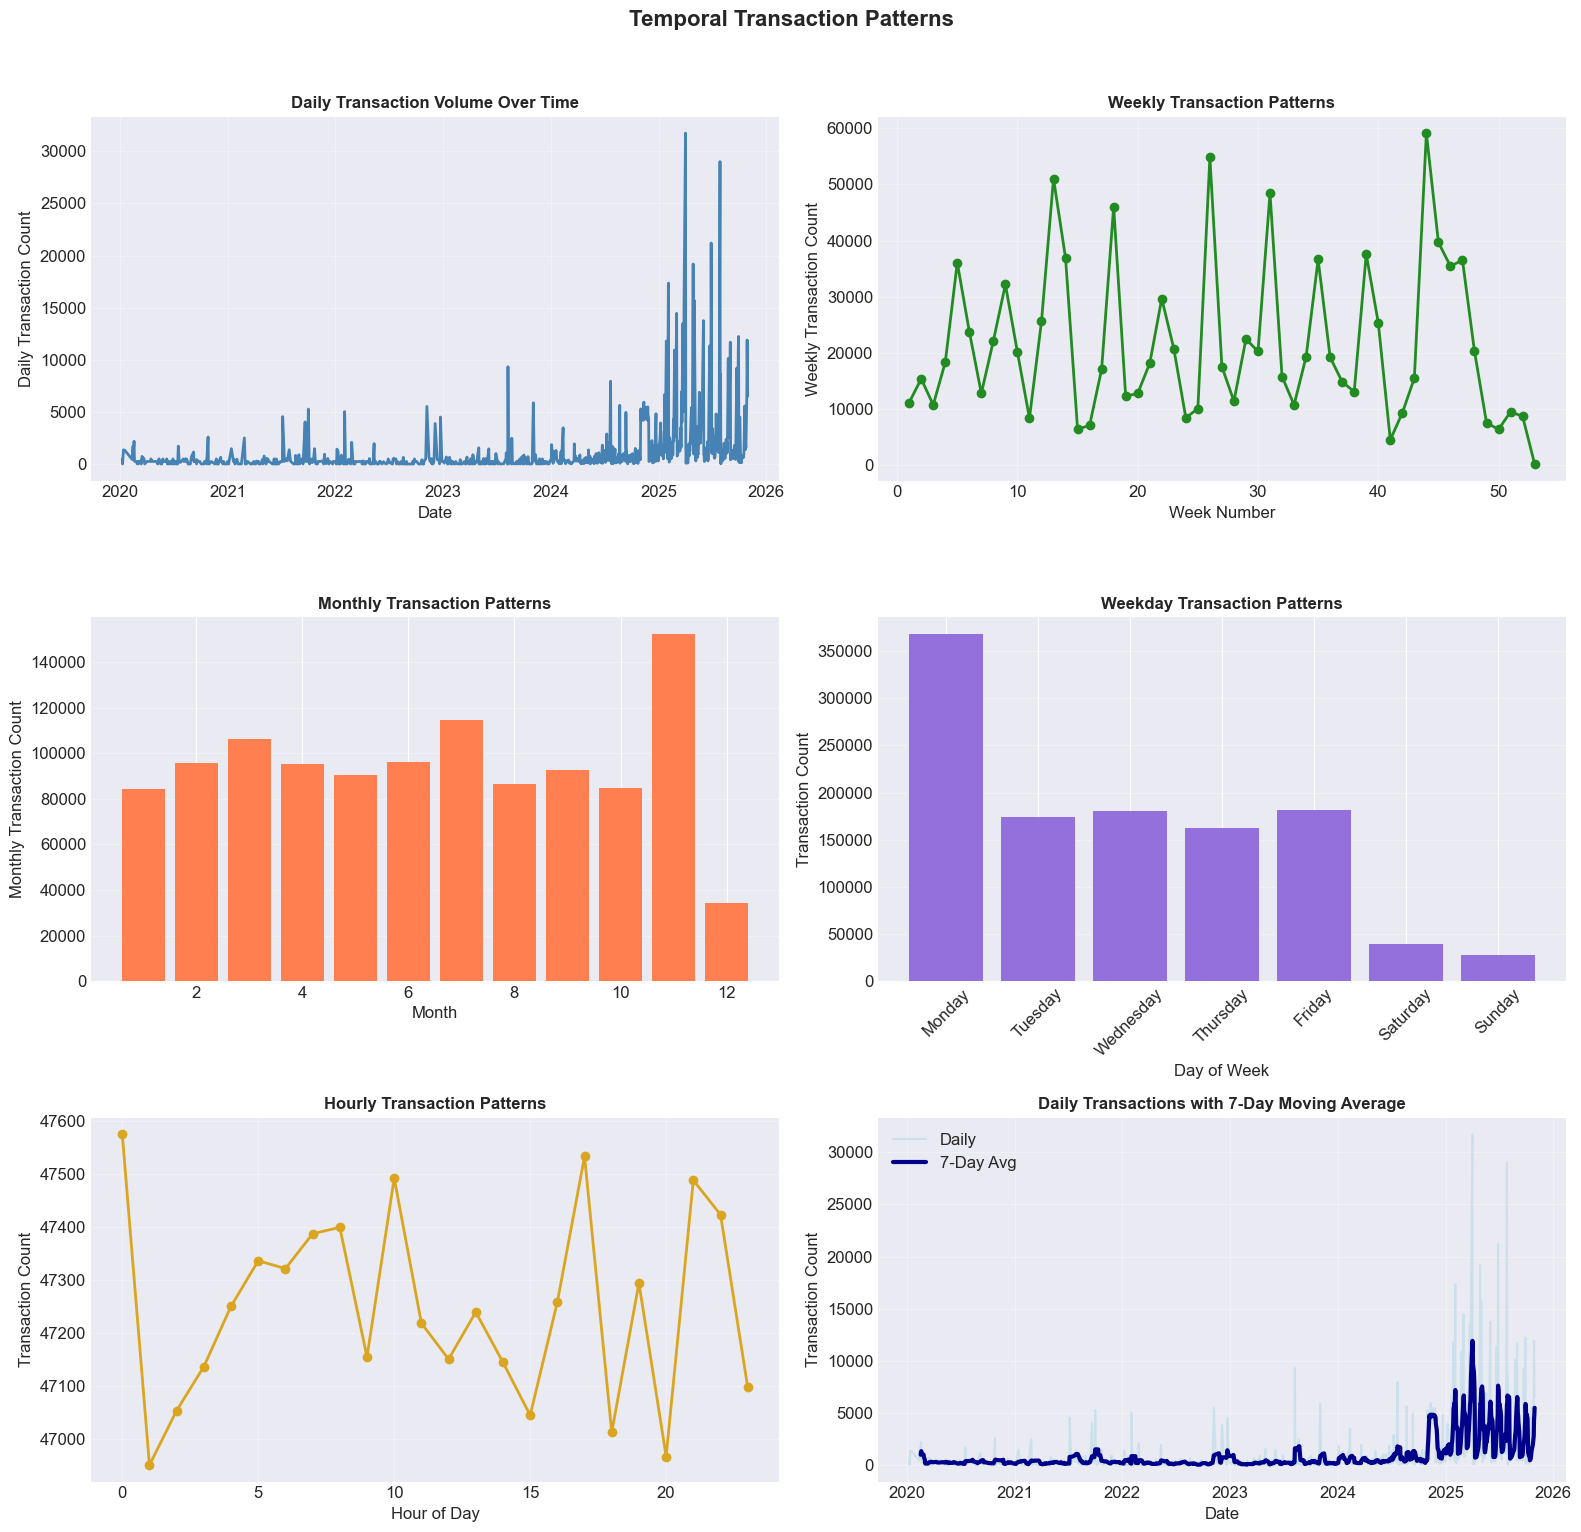

In [31]:
print("⏰ TEMPORAL ANALYSIS")
print("="*60)

# Time-based analysis
if 'Transaction_Date' in df.columns:
    # Daily transaction patterns
    df['Transaction_Date_Only'] = df['Transaction_Date'].dt.date
    daily_stats = df.groupby('Transaction_Date_Only').agg({
        'Transaction_Amount': ['count', 'sum', 'mean'],
        'Account_Number': 'nunique'
    }).round(2)
    
    daily_stats.columns = ['Daily_Count', 'Daily_Total', 'Daily_Avg', 'Daily_Customers']
    
    # Weekly patterns
    df['Transaction_Week'] = df['Transaction_Date'].dt.isocalendar().week
    weekly_stats = df.groupby('Transaction_Week').agg({
        'Transaction_Amount': ['count', 'sum', 'mean']
    }).round(2)
    
    weekly_stats.columns = ['Weekly_Count', 'Weekly_Total', 'Weekly_Avg']
    
    # Monthly patterns
    monthly_stats = df.groupby('Transaction_Month').agg({
        'Transaction_Amount': ['count', 'sum', 'mean']
    }).round(2)
    
    monthly_stats.columns = ['Monthly_Count', 'Monthly_Total', 'Monthly_Avg']
    
    # Weekday patterns
    if 'Transaction_Weekday' in df.columns:
        weekday_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']
        df['Transaction_Weekday'] = pd.Categorical(df['Transaction_Weekday'], categories=weekday_order, ordered=True)
        weekday_stats = df.groupby('Transaction_Weekday').agg({
            'Transaction_Amount': ['count', 'sum', 'mean']
        }).round(2)
        
        weekday_stats.columns = ['Weekday_Count', 'Weekday_Total', 'Weekday_Avg']
    
    # Hourly patterns
    if 'Transaction_Hour' in df.columns:
        hourly_stats = df.groupby('Transaction_Hour').agg({
            'Transaction_Amount': ['count', 'sum', 'mean']
        }).round(2)
        
        hourly_stats.columns = ['Hourly_Count', 'Hourly_Total', 'Hourly_Avg']

# Visualizations
fig, axes = plt.subplots(3, 2, figsize=(16, 15))
    
# Daily transaction count over time
axes[0,0].plot(daily_stats.index, daily_stats['Daily_Count'], linewidth=2, color='steelblue')
axes[0,0].set_xlabel('Date')
axes[0,0].set_ylabel('Daily Transaction Count')
axes[0,0].set_title('Daily Transaction Volume Over Time', fontsize=12, fontweight='bold')
axes[0,0].grid(alpha=0.3)
    
# Weekly patterns
axes[0,1].plot(weekly_stats.index, weekly_stats['Weekly_Count'], marker='o', linewidth=2, color='forestgreen')
axes[0,1].set_xlabel('Week Number')
axes[0,1].set_ylabel('Weekly Transaction Count')
axes[0,1].set_title('Weekly Transaction Patterns', fontsize=12, fontweight='bold')
axes[0,1].grid(alpha=0.3)
    
# Monthly patterns
axes[1,0].bar(monthly_stats.index, monthly_stats['Monthly_Count'], color='coral')
axes[1,0].set_xlabel('Month')
axes[1,0].set_ylabel('Monthly Transaction Count')
axes[1,0].set_title('Monthly Transaction Patterns', fontsize=12, fontweight='bold')
axes[1,0].grid(alpha=0.3, axis='y')
    
# Weekday patterns
if 'weekday_stats' in locals():
    axes[1,1].bar(range(len(weekday_stats)), weekday_stats['Weekday_Count'], color='mediumpurple')
    axes[1,1].set_xticks(range(len(weekday_stats)))
    axes[1,1].set_xticklabels(weekday_stats.index, rotation=45)
    axes[1,1].set_xlabel('Day of Week')
    axes[1,1].set_ylabel('Transaction Count')
    axes[1,1].set_title('Weekday Transaction Patterns', fontsize=12, fontweight='bold')
    axes[1,1].grid(alpha=0.3, axis='y')
    
# Hourly patterns
if 'hourly_stats' in locals():
    axes[2,0].plot(hourly_stats.index, hourly_stats['Hourly_Count'], marker='o', linewidth=2, color='goldenrod')
    axes[2,0].set_xlabel('Hour of Day')
    axes[2,0].set_ylabel('Transaction Count')
    axes[2,0].set_title('Hourly Transaction Patterns', fontsize=12, fontweight='bold')
    axes[2,0].grid(alpha=0.3)
    
# Moving average of daily transactions
if len(daily_stats) > 7:
    daily_stats['7day_avg'] = daily_stats['Daily_Count'].rolling(window=7).mean()
    axes[2,1].plot(daily_stats.index, daily_stats['Daily_Count'], alpha=0.5, label='Daily', color='lightblue')
    axes[2,1].plot(daily_stats.index, daily_stats['7day_avg'], linewidth=3, label='7-Day Avg', color='darkblue')
    axes[2,1].set_xlabel('Date')
    axes[2,1].set_ylabel('Transaction Count')
    axes[2,1].set_title('Daily Transactions with 7-Day Moving Average', fontsize=12, fontweight='bold')
    axes[2,1].legend()
    axes[2,1].grid(alpha=0.3)
    
plt.suptitle('Temporal Transaction Patterns', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

Correlation Analysis

🔗 CORRELATION ANALYSIS


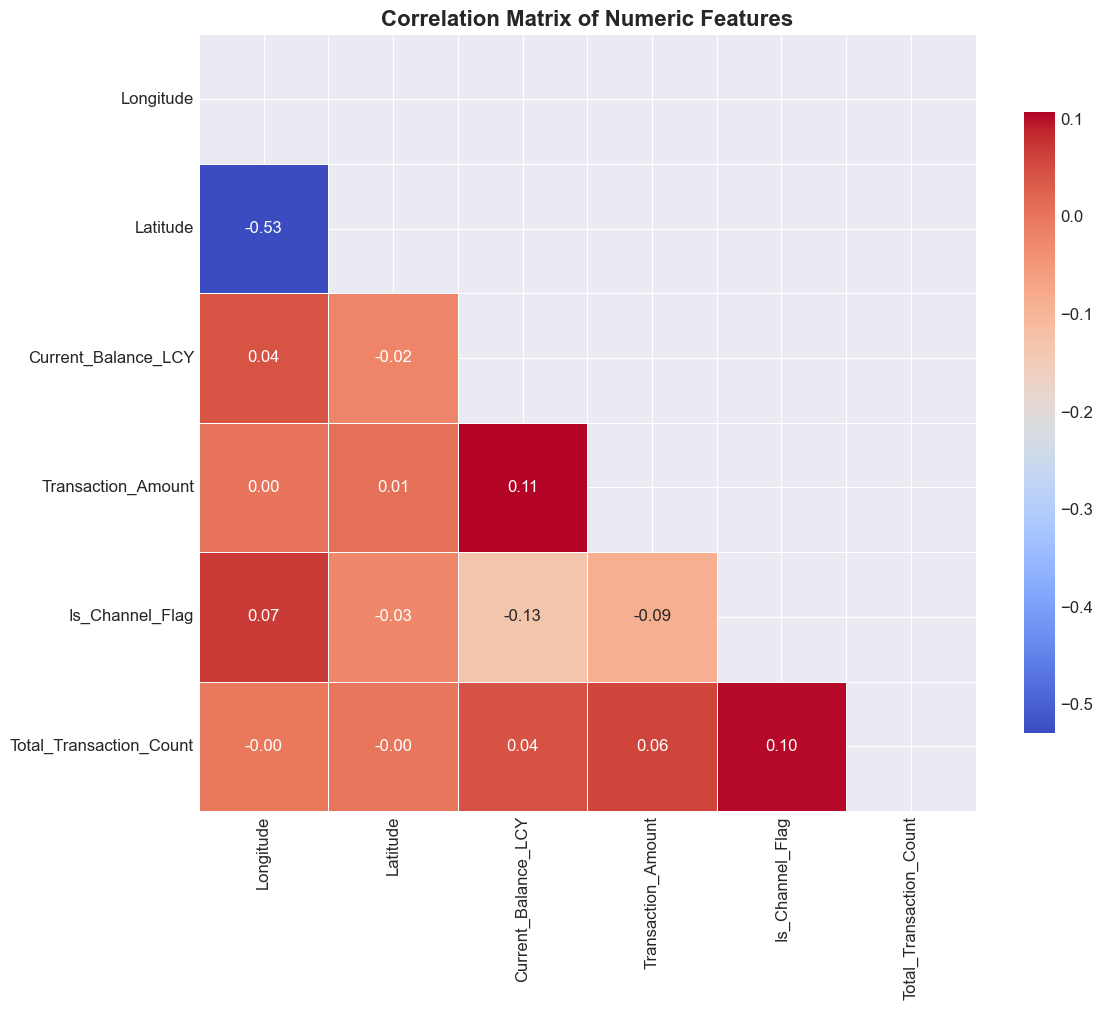


📊 Strong Correlations (|r| > 0.5):
  • Longitude ↔ Latitude: -0.530
  • Latitude ↔ Longitude: -0.530


In [32]:
print("🔗 CORRELATION ANALYSIS")
print("="*60)

# Correlation matrix for numeric features
numeric_features = [col for col in numeric_cols if col not in ['Account_Number', 'Customer_Branch_Code']]

if len(numeric_features) > 1:
    correlation_matrix = df[numeric_features].corr()
    
    # Plot correlation heatmap
    plt.figure(figsize=(12, 10))
    mask = np.triu(np.ones_like(correlation_matrix, dtype=bool))
    sns.heatmap(correlation_matrix, mask=mask, annot=True, fmt='.2f', cmap='coolwarm',
                square=True, linewidths=0.5, cbar_kws={"shrink": 0.8})
    plt.title('Correlation Matrix of Numeric Features', fontsize=16, fontweight='bold')
    plt.tight_layout()
    plt.show()
    
    # Identify strong correlations (absolute value > 0.5)
    strong_correlations = correlation_matrix.unstack().sort_values(ascending=False)
    strong_correlations = strong_correlations[(strong_correlations.abs() > 0.5) & (strong_correlations < 1)]
    
    print("\n📊 Strong Correlations (|r| > 0.5):")
    if len(strong_correlations) > 0:
        for (feat1, feat2), corr in strong_correlations.head(10).items():
            print(f"  • {feat1} ↔ {feat2}: {corr:.3f}")
    else:
        print("  No strong correlations found (|r| > 0.5)")

Data Quality Issues & Recommendations

In [33]:
print("🚨 DATA QUALITY ISSUES & RECOMMENDATIONS")
print("="*60)

# Generate data quality report
quality_report = []

# Check for missing values
missing_cols = missing_data[missing_data['Missing_Percentage'] > 0]
if len(missing_cols) > 0:
    quality_report.append({
        'Issue': 'Missing Values',
        'Severity': 'HIGH' if missing_cols['Missing_Percentage'].max() > 20 else 'MEDIUM',
        'Description': f'{len(missing_cols)} columns have missing values',
        'Recommendation': 'Consider imputation or removal based on business rules'
    })

# Check for duplicate records
if df.duplicated().sum() > 0:
    quality_report.append({
        'Issue': 'Duplicate Records',
        'Severity': 'MEDIUM',
        'Description': f'{df.duplicated().sum():,} duplicate records found',
        'Recommendation': 'Investigate if duplicates are valid or need removal'
    })

# Check for outliers in transaction amounts
if 'Transaction_Amount' in df.columns:
    q1 = df['Transaction_Amount'].quantile(0.25)
    q3 = df['Transaction_Amount'].quantile(0.75)
    iqr = q3 - q1
    lower_bound = q1 - 1.5 * iqr
    upper_bound = q3 + 1.5 * iqr
    
    outliers = df[(df['Transaction_Amount'] < lower_bound) | (df['Transaction_Amount'] > upper_bound)]
    outlier_pct = (len(outliers) / len(df)) * 100
    
    if outlier_pct > 5:
        quality_report.append({
            'Issue': 'Transaction Amount Outliers',
            'Severity': 'MEDIUM',
            'Description': f'{outlier_pct:.1f}% of transactions are outliers',
            'Recommendation': 'Review large transactions for fraud detection'
        })

# Check for invalid dates
if 'Transaction_Date' in df.columns:
    invalid_dates = df['Transaction_Date'].isnull().sum()
    if invalid_dates > 0:
        quality_report.append({
            'Issue': 'Invalid Dates',
            'Severity': 'HIGH',
            'Description': f'{invalid_dates} records have invalid dates',
            'Recommendation': 'Fix date parsing or remove invalid records'
        })

# Check for zero or negative balances/amounts if relevant
if 'Current_Balance_LCY' in df.columns:
    negative_balances = (df['Current_Balance_LCY'] < 0).sum()
    if negative_balances > 0:
        quality_report.append({
            'Issue': 'Negative Balances',
            'Severity': 'HIGH',
            'Description': f'{negative_balances} accounts have negative balances',
            'Recommendation': 'Investigate overdraft accounts'
        })

if 'Transaction_Amount' in df.columns:
    zero_amounts = (df['Transaction_Amount'] == 0).sum()
    if zero_amounts > 0:
        quality_report.append({
            'Issue': 'Zero Amount Transactions',
            'Severity': 'LOW',
            'Description': f'{zero_amounts} transactions have zero amount',
            'Recommendation': 'Review if these are valid (fees, reversals)'
        })

# Display quality report
quality_df = pd.DataFrame(quality_report)
if len(quality_df) > 0:
    display(quality_df.style.apply(lambda x: ['background: lightcoral' if x['Severity'] == 'HIGH' 
                                            else 'background: lightyellow' if x['Severity'] == 'MEDIUM'
                                            else 'background: lightgreen' for i in x], axis=1))
else:
    print("✅ No major data quality issues found!")

🚨 DATA QUALITY ISSUES & RECOMMENDATIONS


,Issue,Severity,Description,Recommendation
0,Missing Values,MEDIUM,6 columns have missing values,Consider imputation or removal based on business rules
1,Transaction Amount Outliers,MEDIUM,18.5% of transactions are outliers,Review large transactions for fraud detection
2,Zero Amount Transactions,LOW,1169 transactions have zero amount,"Review if these are valid (fees, reversals)"


Key Insights Summary

In [34]:
print("🎯 KEY INSIGHTS SUMMARY")
print("="*60)

# Generate key insights
insights = []

# Basic statistics
insights.append(f"📈 **Dataset Size**: {df.shape[0]:,} transactions, {df.shape[1]} features")

# Customer insights
if 'Account_Number' in df.columns:
    unique_customers = df['Account_Number'].nunique()
    avg_txn_per_customer = df.shape[0] / unique_customers if unique_customers > 0 else 0
    insights.append(f"👥 **Unique Customers**: {unique_customers:,} (Avg {avg_txn_per_customer:.1f} txn/customer)")

# Transaction insights
if 'Transaction_Amount' in df.columns:
    total_amount = df['Transaction_Amount'].sum()
    avg_amount = df['Transaction_Amount'].mean()
    insights.append(f"💰 **Transaction Value**: Total ${total_amount:,.0f} (Avg ${avg_amount:,.0f}/txn)")

# Channel insights
if 'Transaction_Channel_Name' in df.columns:
    top_channel = df['Transaction_Channel_Name'].mode().iloc[0] if not df['Transaction_Channel_Name'].mode().empty else 'N/A'
    top_channel_pct = (df['Transaction_Channel_Name'] == top_channel).mean() * 100
    insights.append(f"🏦 **Top Channel**: {top_channel} ({top_channel_pct:.1f}% of transactions)")

# Regional insights
if 'Region' in df.columns:
    top_region = df['Region'].mode().iloc[0] if not df['Region'].mode().empty else 'N/A'
    top_region_pct = (df['Region'] == top_region).mean() * 100
    insights.append(f"🌍 **Top Region**: {top_region} ({top_region_pct:.1f}% of transactions)")

# Debit/Credit insights
if 'Debit_Credit_Flag' in df.columns:
    debit_pct = (df['Debit_Credit_Flag'] == 'D').mean() * 100 if 'D' in df['Debit_Credit_Flag'].values else 0
    credit_pct = (df['Debit_Credit_Flag'] == 'C').mean() * 100 if 'C' in df['Debit_Credit_Flag'].values else 0
    insights.append(f"⚖️ **Transaction Mix**: Debit {debit_pct:.1f}%, Credit {credit_pct:.1f}%")

# Temporal insights
if 'Transaction_Date' in df.columns:
    date_range = df['Transaction_Date'].max() - df['Transaction_Date'].min()
    insights.append(f"📅 **Time Period**: {date_range.days} days of data")

# Data quality insights
missing_pct = df.isnull().sum().sum() / (df.shape[0] * df.shape[1]) * 100
insights.append(f"✅ **Data Quality**: {missing_pct:.2f}% missing values overall")

# Display insights
print("\n".join(insights))

🎯 KEY INSIGHTS SUMMARY
📈 **Dataset Size**: 1,138,311 transactions, 24 features
👥 **Unique Customers**: 3,230 (Avg 352.4 txn/customer)
💰 **Transaction Value**: Total $21,803,138,409,284 (Avg $19,227,720/txn)
🏦 **Top Channel**: System User (42.0% of transactions)
🌍 **Top Region**: Greater Accra Region (75.9% of transactions)
⚖️ **Transaction Mix**: Debit 0.0%, Credit 0.0%
📅 **Time Period**: 2121 days of data
✅ **Data Quality**: 0.10% missing values overall


Export Cleaned Data & Summary

In [35]:
print("💾 EXPORTING RESULTS")
print("="*60)

# Create output directory if it doesn't exist
import os
output_dir = '../data/outputs'
os.makedirs(output_dir, exist_ok=True)

# Export cleaned data
output_path = f'{output_dir}/cleaned_exploration1_data.csv'
df.to_csv(output_path, index=False)
print(f"✅ Cleaned data exported to: {output_path}")

💾 EXPORTING RESULTS
✅ Cleaned data exported to: ../data/outputs/cleaned_exploration1_data.csv


In [36]:
# Export summary statistics
summary_stats = {
    'total_records': len(df),
    'total_columns': len(df.columns),
    'unique_customers': df['Account_Number'].nunique() if 'Account_Number' in df.columns else 0,
    'unique_branches': df['Customer_Branch_Code'].nunique() if 'Customer_Branch_Code' in df.columns else 0,
    'total_transaction_amount': df['Transaction_Amount'].sum() if 'Transaction_Amount' in df.columns else 0,
    'avg_transaction_amount': df['Transaction_Amount'].mean() if 'Transaction_Amount' in df.columns else 0,
    'data_start_date': df['Transaction_Date'].min() if 'Transaction_Date' in df.columns else 'N/A',
    'data_end_date': df['Transaction_Date'].max() if 'Transaction_Date' in df.columns else 'N/A',
    'missing_values_pct': df.isnull().sum().sum() / (len(df) * len(df.columns)) * 100
}

summary_df = pd.DataFrame(list(summary_stats.items()), columns=['Metric', 'Value'])
summary_path = f'{output_dir}/exploration_summary1.csv'
summary_df.to_csv(summary_path, index=False)
print(f"✅ Summary statistics exported to: {summary_path}")

✅ Summary statistics exported to: ../data/outputs/exploration_summary1.csv


In [37]:
# Export quality report
if 'quality_df' in locals() and len(quality_df) > 0:
    quality_path = f'{output_dir}/data_quality_report1.csv'
    quality_df.to_csv(quality_path, index=False)
    print(f"✅ Data quality report exported to: {quality_path}")

print("\n" + "="*60)
print("🎉 DATA EXPLORATION COMPLETE!")
print("="*60)
print("\nProceed to 02_feature_engineering.ipynb for the next step.")

✅ Data quality report exported to: ../data/outputs/data_quality_report1.csv

🎉 DATA EXPLORATION COMPLETE!

Proceed to 02_feature_engineering.ipynb for the next step.
